# OJECTIVE : Developing a Machine Learning System for Detecting and Mitigating Phishing Attacks

Our dataset consist of 10k samples of legitimate and malicious domain urls,in this notebook we'll first explore the dataset and then train a classifier model which would optimally predict malicious and legitimate urls.

Dataset:  https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning/data


In [45]:
import numpy as np   # use for multi-dimensional array and matrix.
import pandas as pd  # use for data manipulation and analysis.

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend.

import os # it provides a way of interacting with the operating system, allowing you to navigate, create, delete and modify files and directories.
import pickle # use for serializing (saving) and deserializing (loading) Python object structures.

 
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.tree import DecisionTreeClassifier     # algo use to predict good or bad
from sklearn.ensemble import RandomForestClassifier # algo use to predict good or bad

from sklearn.model_selection import train_test_split # use for splitting data arrays into train and test subsets.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # use for evaluating the performance of classification models.
from sklearn.preprocessing import StandardScaler # use for standardizing the features by removing the mean and scaling to unit variance.

## Data Preparation

In [46]:
data = pd.read_csv('Phishing_Legitimate_full.csv')
data.head(5)

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0                 1   
2              0             0                 0                 1   
3              0             0                 0                 1   
4              1             0                 0                 1   

   UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0            0                     1                       1   
1           -1                     1                       1   
2            0                    -1                       1   
3           -1                     1                       1   
4            1                    -1                       0   

   ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                   -1                                   1            1  
1                    1                                   1            1  
2                   -1                                   0            1  
3                    1                                  -1            1  
4                   -1                                  -1            1  

[5 rows x 50 columns]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<strong>CLASS_LABEL:</strong>The target variable the model is trying to predict. A value of 1 could indicate a phishing site, and a value of 0 a legitimate site.

<strong>FrequentDomainNameMismatch:</strong>Indicates whether the domain name often appears with inconsistencies, which can be a sign of phishing.

<strong>PctNullSelfRedirectHyperlinks:</strong>The percentage of self-redirecting hyperlinks that are null, potentially used to obscure malicious redirections.

<strong>InsecureForms:</strong>Presence of forms that are not secure or transmit data insecurely, commonly found on phishing sites.

<strong>NumDots:</strong>The number of dots in the URL, which might be high in phishing URLs to mimic legitimate domains.

<strong>PctExtHyperlinks:</strong>The percentage of external hyperlinks; a high number might be suspicious in a phishing context.

<strong>NumSensitiveWords:</strong>The number of sensitive words in the URL, which could be used to deceive users.

<strong>PathLevel:</strong>The depth level of the path in the URL, which might be used to hide the true destination of the link.

<strong>AbnormalExtFormActionR:</strong>Abnormal forms of external form action, indicating forms that might be used for phishing.

<strong>UrlLengthRT:</strong>The relative length of the URL; phishing URLs are often abnormally long or short.

<strong>HostnameLength:</strong>The length of the hostname in the URL, which can be used to detect suspicious domain names.

<strong>NumDashInHostname:</strong>The number of dashes in the hostname; a high number can be used in phishing domains.

<strong>EmbeddedBrandName:</strong>Brand name embedded in the URL, often a sign of phishing attempts imitating a known brand.

<strong>IpAddress:</strong>Whether the IP address is used directly in the URL instead of a domain name, which might be suspicious.

<strong>MissingTitle:</strong>The absence of a title in the webpage, which can be an indicator of quality or legitimacy.

<strong>ExtMetaScriptLinkRT:</strong>Abnormal external metadata, scripts, or links that could indicate malicious behavior.

<strong>DomainInSubdomains:</strong>Use of recognized domains within the subdomain to deceive users.

<strong>TildeSymbol:</strong>The presence of the tilde symbol in the URL, sometimes used in phishing URLs.

<strong>RightClickDisabled:</strong>Right-click disabled on a web page, often used to prevent examining page content.

<strong>ExtFavicon:</strong>Use of an external favicon, which might be used to deceive users by imitating a legitimate site.

<strong>PctExtResourceUrlsRT:</strong>The percentage of resources (images, scripts) loaded from external domains.

<strong>NumHash:</strong>The number of hash (#) symbols in the URL, which might be used in phishing to add confusion.

In [48]:
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [49]:
 data.describe()

id       NumDots  SubdomainLevel     PathLevel     UrlLength  \
count  10000.00000  10000.000000    10000.000000  10000.000000  10000.000000   
mean    5000.50000      2.445100        0.586800      3.300300     70.264100   
std     2886.89568      1.346836        0.751214      1.863241     33.369877   
min        1.00000      1.000000        0.000000      0.000000     12.000000   
25%     2500.75000      2.000000        0.000000      2.000000     48.000000   
50%     5000.50000      2.000000        1.000000      3.000000     62.000000   
75%     7500.25000      3.000000        1.000000      4.000000     84.000000   
max    10000.00000     21.000000       14.000000     18.000000    253.000000   

            NumDash  NumDashInHostname      AtSymbol   TildeSymbol  \
count  10000.000000       10000.000000  10000.000000  10000.000000   
mean       1.818000           0.138900      0.000300      0.013100   
std        3.106258           0.545744      0.017319      0.113709   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.000000           0.000000      0.000000      0.000000   
75%        2.000000           0.000000      0.000000      0.000000   
max       55.000000           9.000000      1.000000      1.000000   

       NumUnderscore  ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  \
count    10000.00000  ...   10000.000000   10000.00000      10000.000000   
mean         0.32320  ...       0.339600       0.03220          0.030400   
std          1.11466  ...       0.473597       0.17654          0.171694   
min          0.00000  ...       0.000000       0.00000          0.000000   
25%          0.00000  ...       0.000000       0.00000          0.000000   
50%          0.00000  ...       0.000000       0.00000          0.000000   
75%          0.00000  ...       1.000000       0.00000          0.000000   
max         18.00000  ...       1.000000       1.00000          1.000000   

       SubdomainLevelRT   UrlLengthRT  PctExtResourceUrlsRT  \
count      10000.000000  10000.000000          10000.000000   
mean           0.956600      0.020200              0.353300   
std            0.248037      0.820036              0.888908   
min           -1.000000     -1.000000             -1.000000   
25%            1.000000     -1.000000             -1.000000   
50%            1.000000      0.000000              1.000000   
75%            1.000000      1.000000              1.000000   
max            1.000000      1.000000              1.000000   

       AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
count            10000.000000         10000.000000   
mean                 0.793200             0.173400   
std                  0.521019             0.755771   
min                 -1.000000            -1.000000   
25%                  1.000000             0.000000   
50%                  1.000000             0.000000   
75%                  1.000000             1.000000   
max                  1.000000             1.000000   

       PctExtNullSelfRedirectHyperlinksRT   CLASS_LABEL  
count                        10000.000000  10000.000000  
mean                             0.314100      0.500000  
std                              0.897843      0.500025  
min                             -1.000000      0.000000  
25%                             -1.000000      0.000000  
50%                              1.000000      0.500000  
75%                              1.000000      1.000000  
max                              1.000000      1.000000  

[8 rows x 50 columns]

In [50]:
data.shape

(10000, 50)

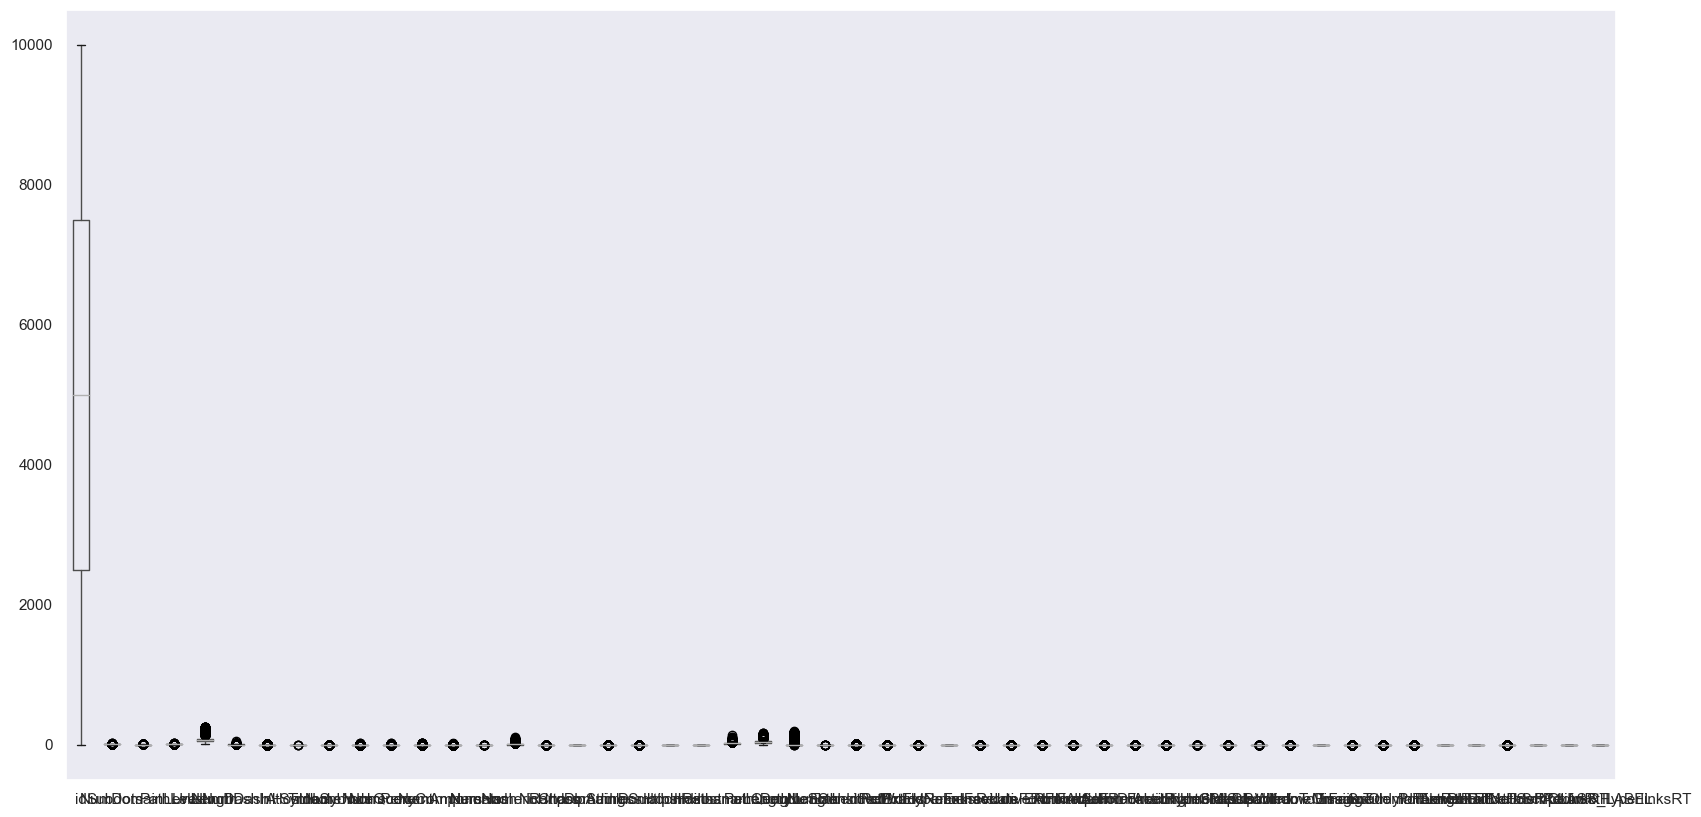

In [56]:

data.boxplot(figsize =(20,10), grid = False) 
plt.show()

## Exploratory Data Analysis

### Objective :

Understand our data as well as possible (a small step forward is better than a big step back) Develop a first modeling strategy.

      Shape Analysis:
* target variable:------------> CLASS_LABEL

* rows and columns:-----------> (10000, 50)

* CLASS_LABEL column is prediction column with 2 categories
      A. 0 - this means the URLs is legitimate.
      B. 1 – this means the URLs is phishing.
* variable types:-------------> Int64 and Float64

* Analysis of missing values:--> 0% of NAN



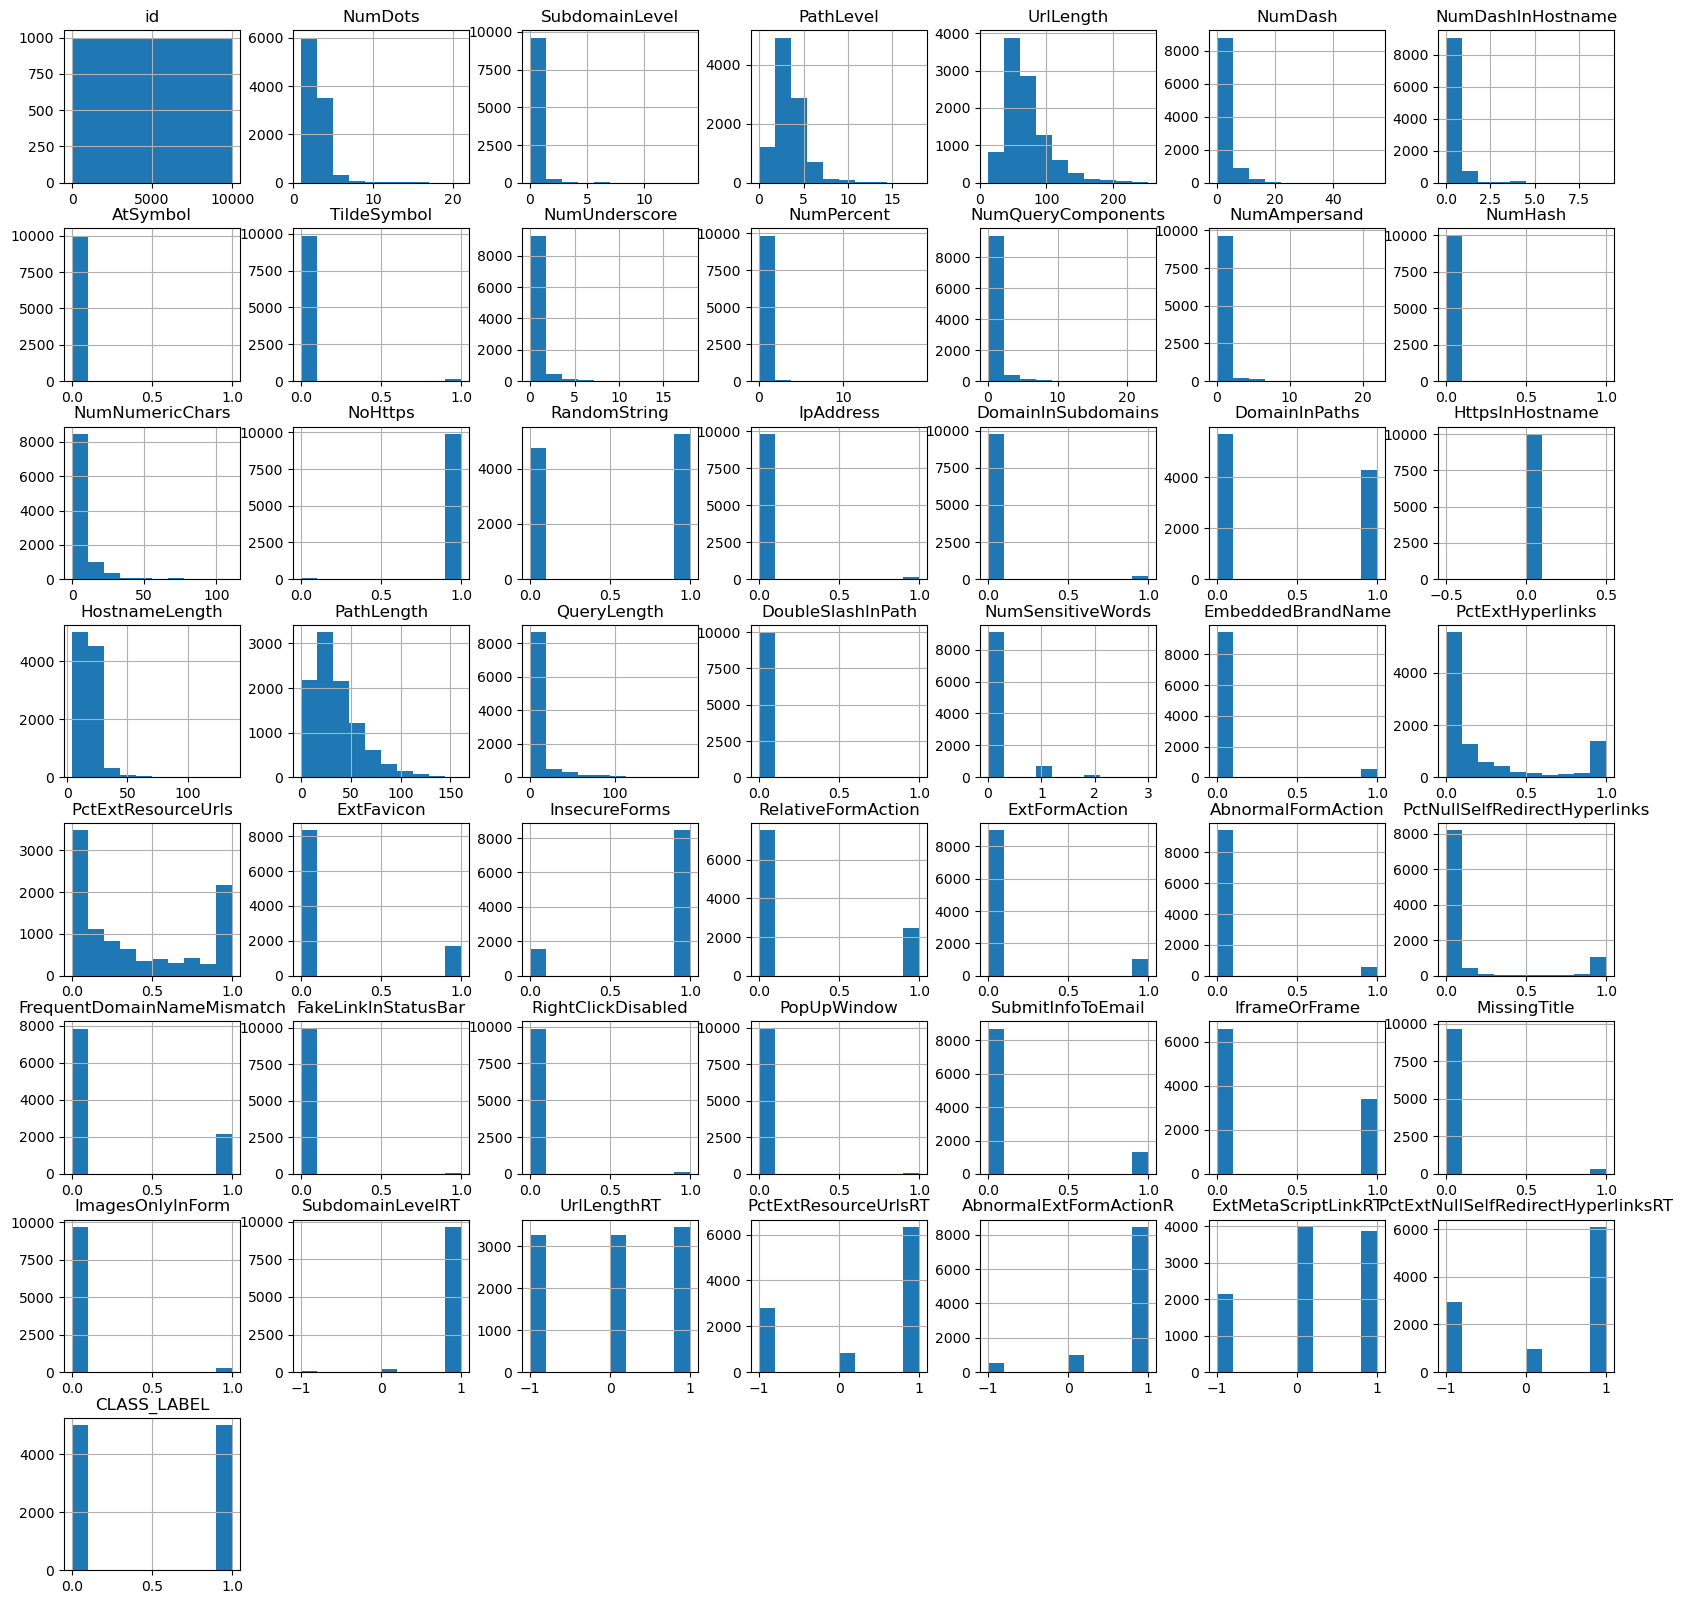

In [7]:
p= data.hist(figsize=(20,20))

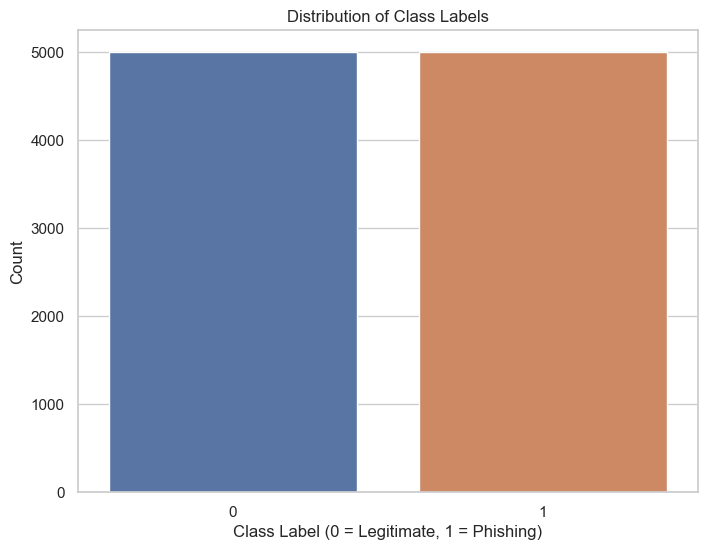

1    0.5
0    0.5
Name: CLASS_LABEL, dtype: float64

In [8]:
# Setting plot style
sns.set(style="whitegrid")

# Distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASS_LABEL', data=data)
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

# Checking the balance of classes
class_balance = data['CLASS_LABEL'].value_counts(normalize=True)
class_balance


###### The visualization shows that the classes in the dataset are perfectly balanced, with an equal distribution of 50% for each class (0 for legitimate sites and 1 for phishing sites). This balance is ideal for a machine learning model, as it avoids bias towards a particular class.

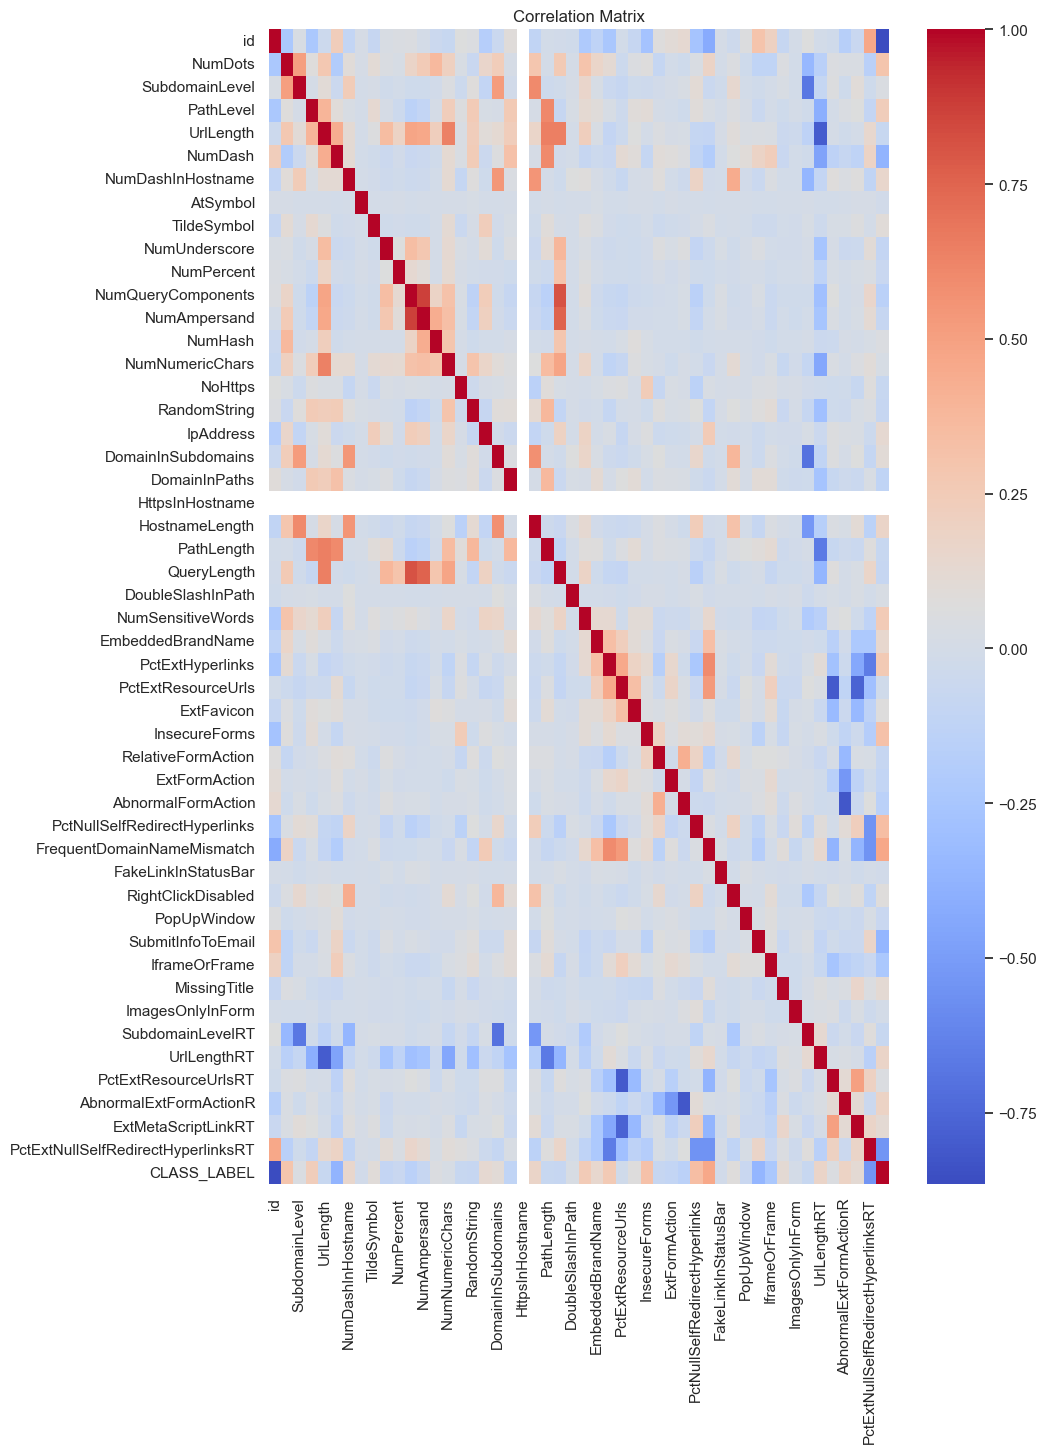

In [9]:
# Calculating correlations
correlations = data.corr()

# Plotting the correlations
plt.figure(figsize=(10, 15))
sns.heatmap(correlations, 
            annot=False, 
            cmap='coolwarm', 
            cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Correlation with the target variable CLASS_LABEL
correlation_with_target = correlations['CLASS_LABEL'].sort_values(ascending=False)


correlation_with_target


CLASS_LABEL                           1.000000
FrequentDomainNameMismatch            0.463956
PctNullSelfRedirectHyperlinks         0.342806
InsecureForms                         0.316380
NumDots                               0.294111
PctExtHyperlinks                      0.259728
NumSensitiveWords                     0.255208
PathLevel                             0.229450
AbnormalExtFormActionR                0.185799
UrlLengthRT                           0.169513
HostnameLength                        0.169157
NumDashInHostname                     0.150444
EmbeddedBrandName                     0.141790
IpAddress                             0.132291
MissingTitle                          0.116693
ExtMetaScriptLinkRT                   0.111150
DomainInSubdomains                    0.100452
TildeSymbol                           0.095864
RightClickDisabled                    0.074900
ExtFavicon                            0.069140
PctExtResourceUrlsRT                  0.052089
NumHash      

#### The correlation matrix and the list of correlations with the target variable CLASS_LABEL reveal several key points:

##### Strong Positive Correlations:

* FrequentDomainNameMismatch: A strong positive correlation, suggesting that phishing sites are more likely to have                               inconsistencies in the domain name.
* PctNullSelfRedirectHyperlinks: Another important characteristic, indicating that phishing sites may have a higher                                  percentage of null self-redirecting links.

##### Strong Negative Correlations:

* PctExtNullSelfRedirectHyperlinksRT: A strong negative correlation, which could mean that legitimate sites tend to                                       have a lower percentage of these links.
* NumDash: A high number of dashes in the URL seems to be an indicator of phishing sites."






In [11]:
# Define a threshold for weak correlations
weak_correlation_threshold = 0.05

# Calculate correlations with the target variable
correlations = data.corr()['CLASS_LABEL']

# Select features with an absolute correlation greater than the threshold
important_features = correlations[abs(correlations) > weak_correlation_threshold].index.tolist()

# Filter the dataframe to keep only the important features
data_filtered = data[important_features]

# Display the selected features
data_filtered.head()


id  NumDots  PathLevel  UrlLength  NumDash  NumDashInHostname  TildeSymbol  \
0   1        3          5         72        0                  0            0   
1   2        3          3        144        0                  0            0   
2   3        3          2         58        0                  0            0   
3   4        3          6         79        1                  0            0   
4   5        3          4         46        0                  0            0   

   NumUnderscore  NumPercent  NumQueryComponents  ...  SubmitInfoToEmail  \
0              0           0                   0  ...                  0   
1              2           0                   2  ...                  0   
2              0           0                   0  ...                  0   
3              0           0                   0  ...                  1   
4              0           0                   0  ...                  0   

   IframeOrFrame  MissingTitle  SubdomainLevelRT  UrlLengthRT  \
0              0             0                 1            0   
1              0             0                 1           -1   
2              0             0                 1            0   
3              0             0                 1           -1   
4              1             0                 1            1   

   PctExtResourceUrlsRT  AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
0                     1                       1                   -1   
1                     1                       1                    1   
2                    -1                       1                   -1   
3                     1                       1                    1   
4                    -1                       0                   -1   

   PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                                   1            1  
1                                   1            1  
2                                   0            1  
3                                  -1            1  
4                                  -1            1  

[5 rows x 41 columns]

###### This step of feature selection is important in the machine learning process, as it can help reduce the complexity of the model, improve performance, and prevent overfitting.

In [12]:
def get_histplot_central_tendency(data_filtered, field, target):
    v_dist_1 = data_filtered[field].values
    plt.figure()
    sns.histplot(v_dist_1, kde=True)

    mean = data_filtered[field].mean()
    median = data_filtered[field].median()
    mode = data_filtered[field].mode()

    plt.axvline(mean, color="r", linestyle="--", label="Mean")
    plt.axvline(median, color="g", linestyle="-", label="Median")
    plt.axvline(median, color="b", linestyle=":", label="Mode")
    plt.xlabel(f"count", fontsize=13, color="#333F4B")
    plt.ylabel(f"{field}", fontsize=13, color="#333F4B")
    plt.legend()
    plt.grid(False)
    plt.title(f"Representation Histogram for {field} - {target}", fontsize=18)
    plt.plot(color="white", lw=3)
    plt.show()

In [13]:
data_filtered.columns

Index(['id', 'NumDots', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NoHttps', 'RandomString',
       'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HostnameLength',
       'PathLength', 'QueryLength', 'NumSensitiveWords', 'EmbeddedBrandName',
       'PctExtHyperlinks', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction',
       'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT',
       'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL'],
      dtype='object')

In [14]:
features = ['id', 'NumDots', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NoHttps', 'RandomString',
       'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HostnameLength',
       'PathLength', 'QueryLength', 'NumSensitiveWords', 'EmbeddedBrandName',
       'PctExtHyperlinks', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction',
       'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT',
       'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT']

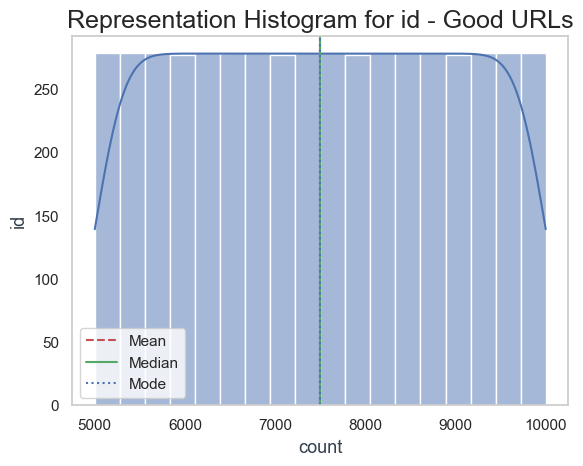

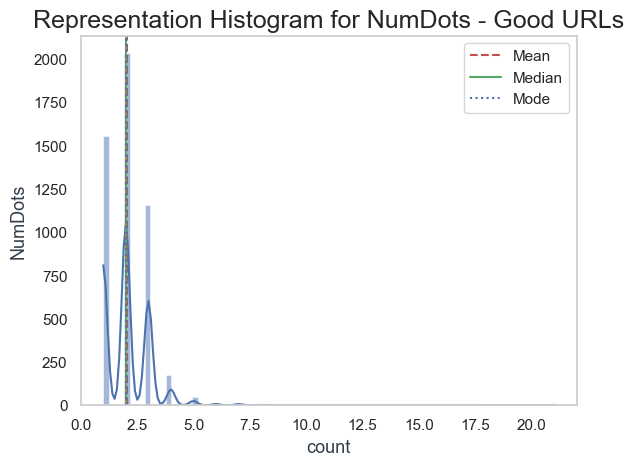

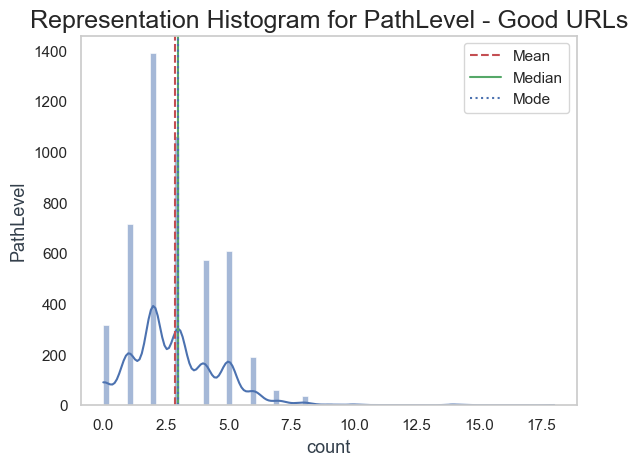

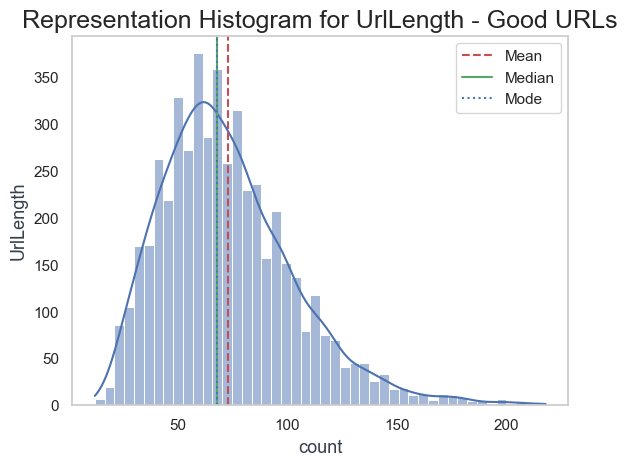

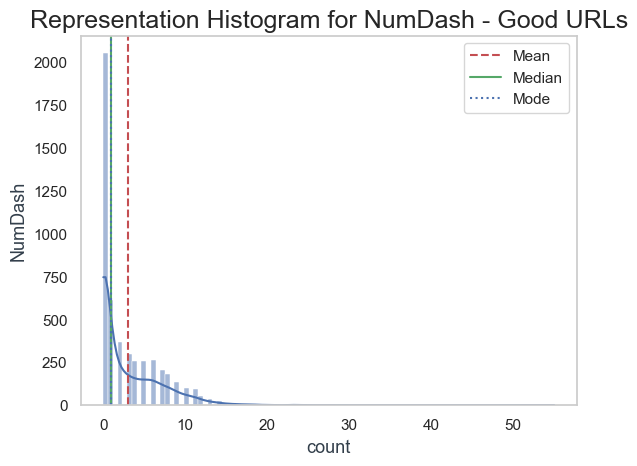

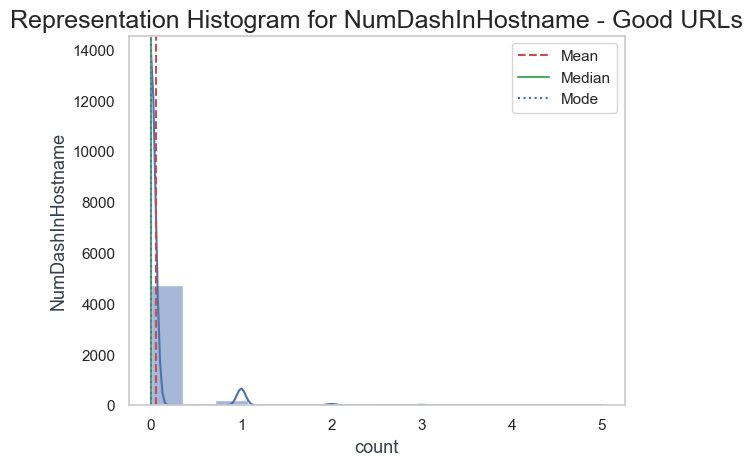

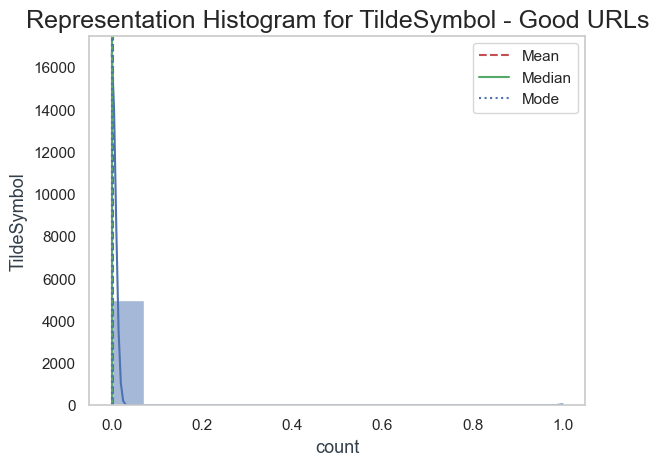

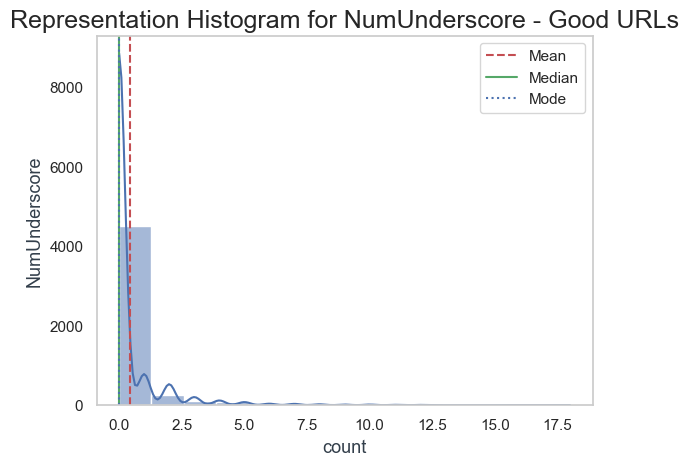

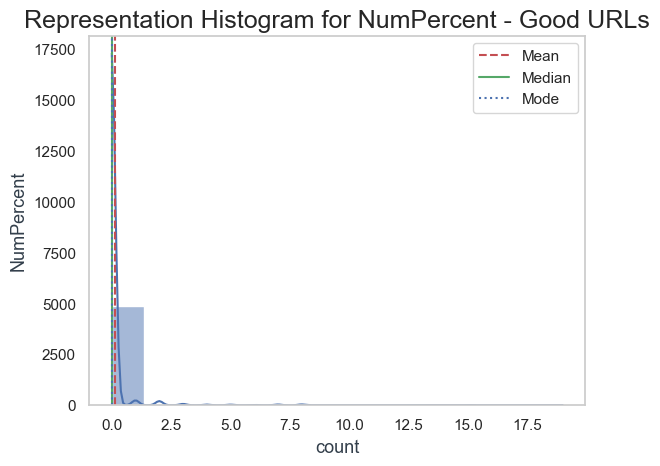

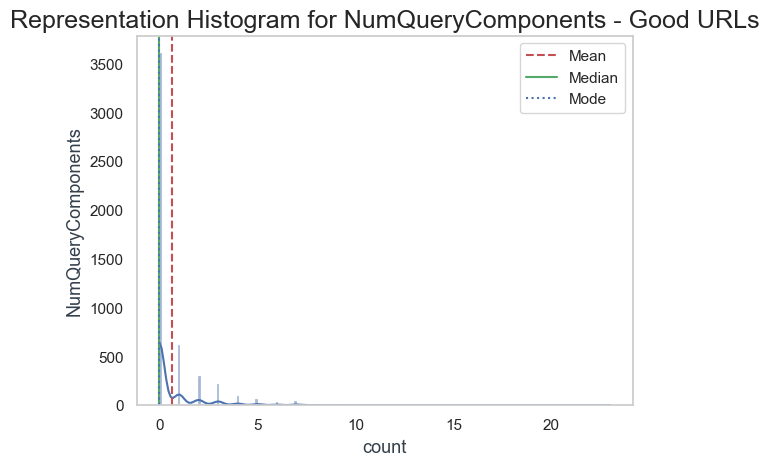

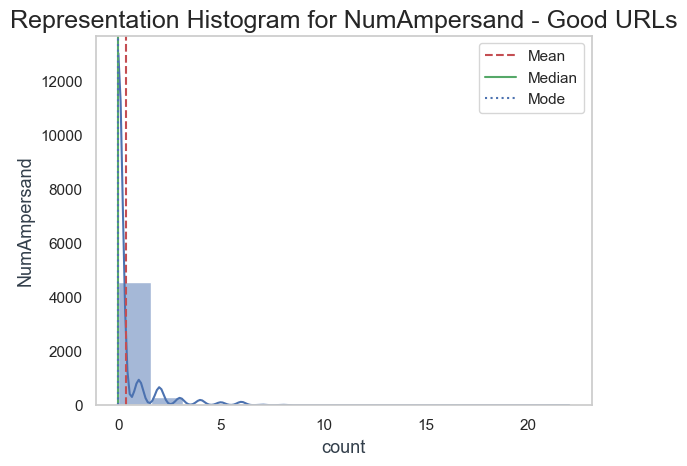

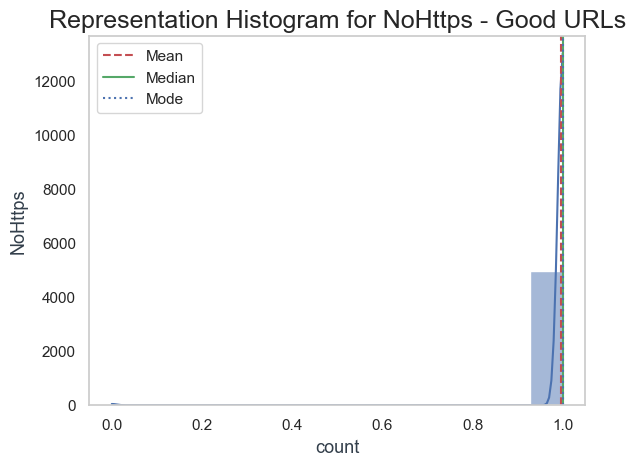

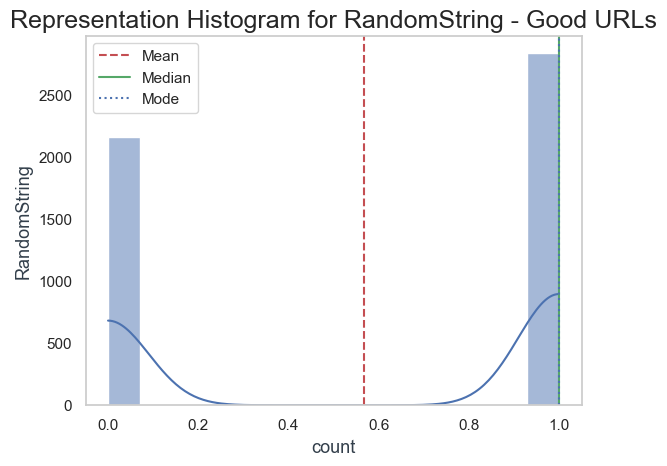

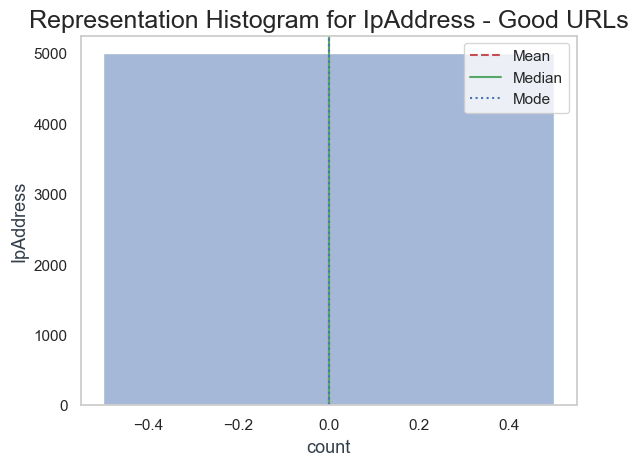

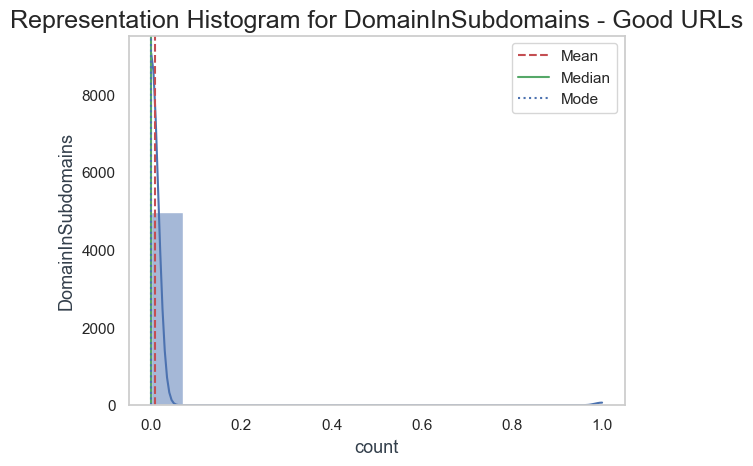

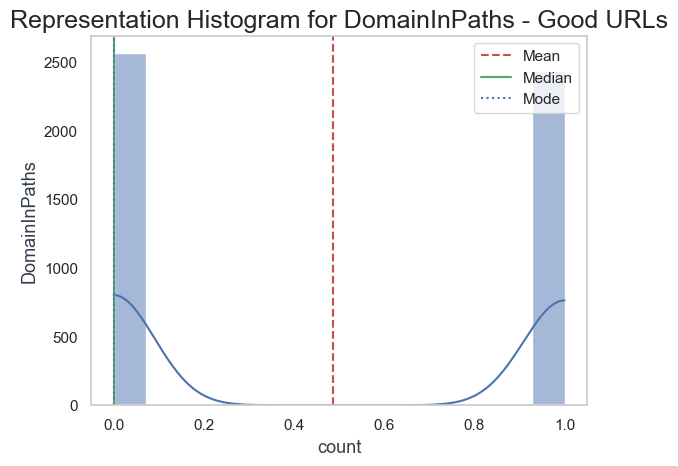

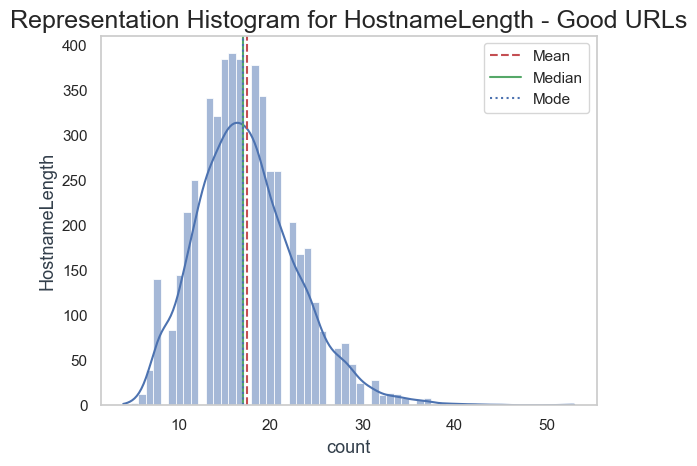

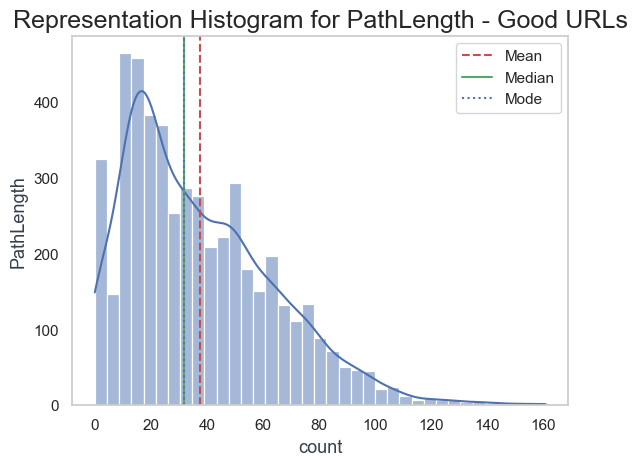

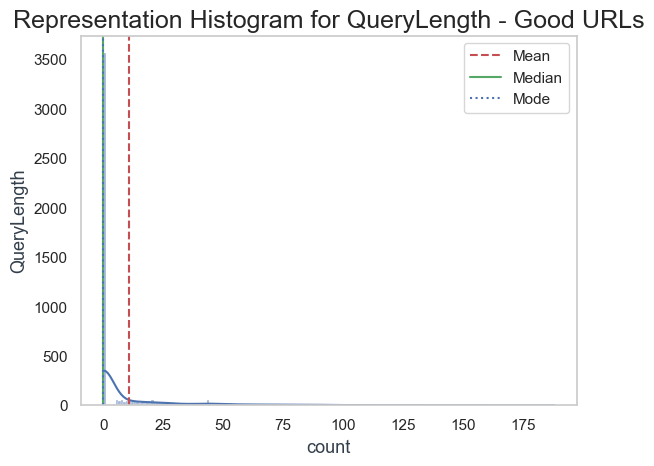

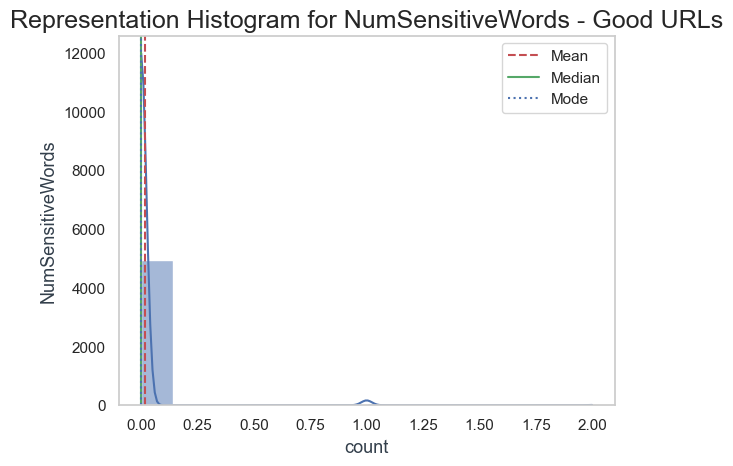

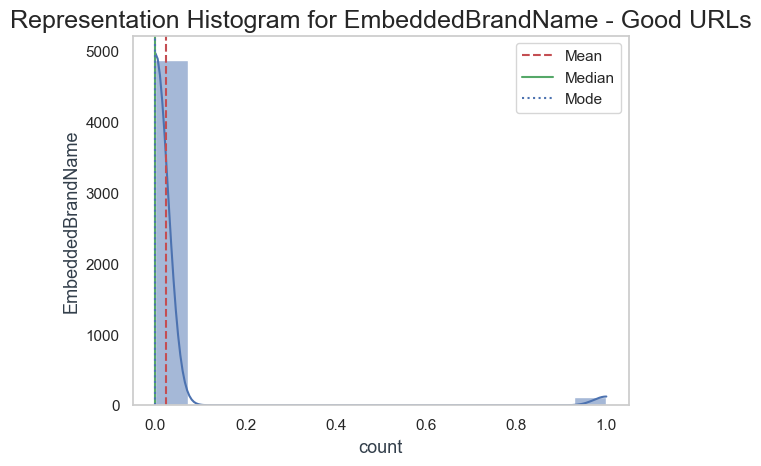

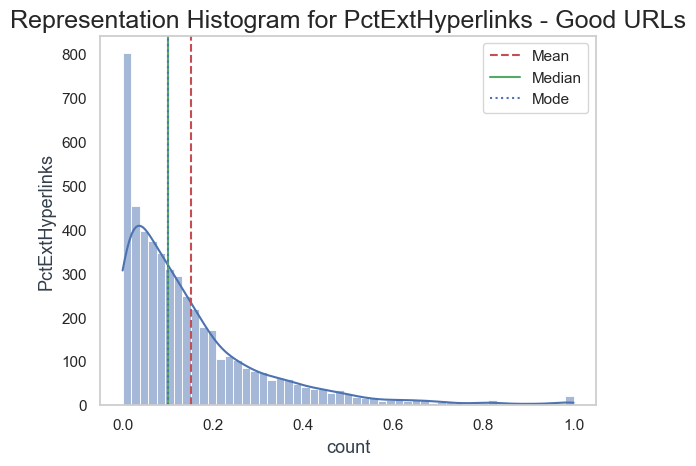

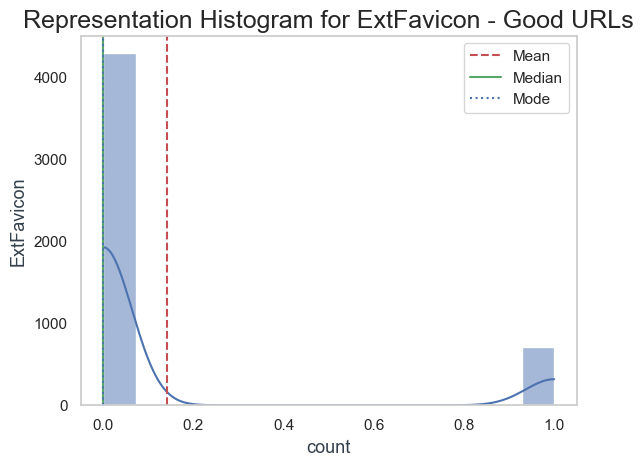

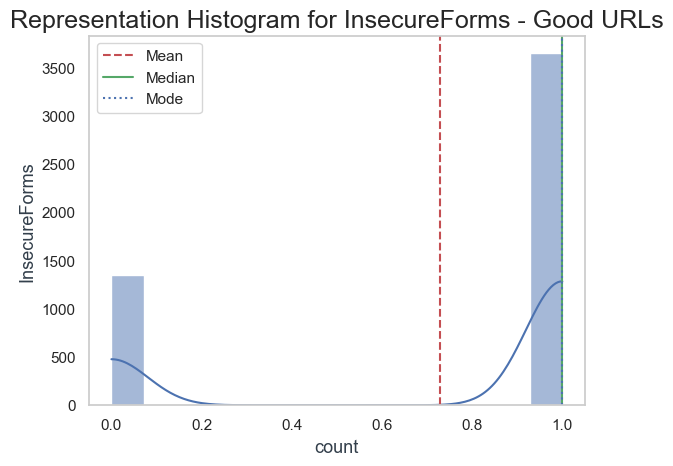

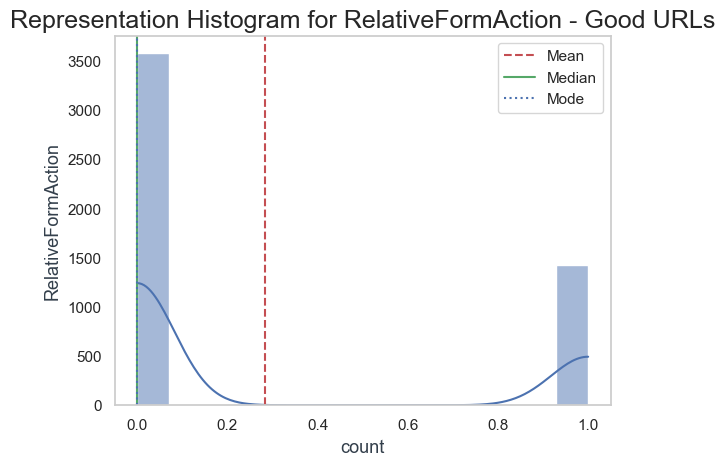

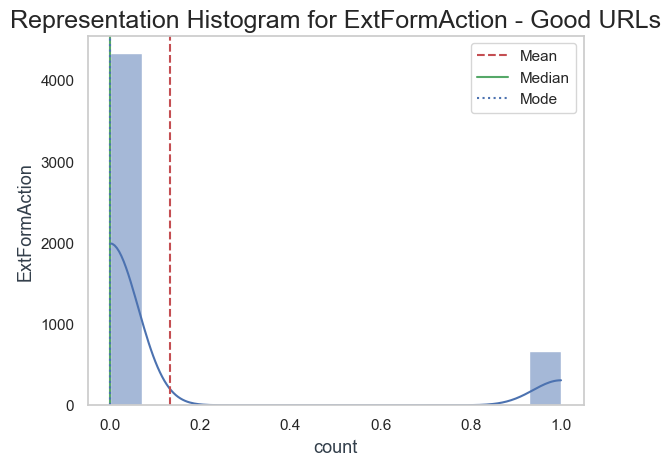

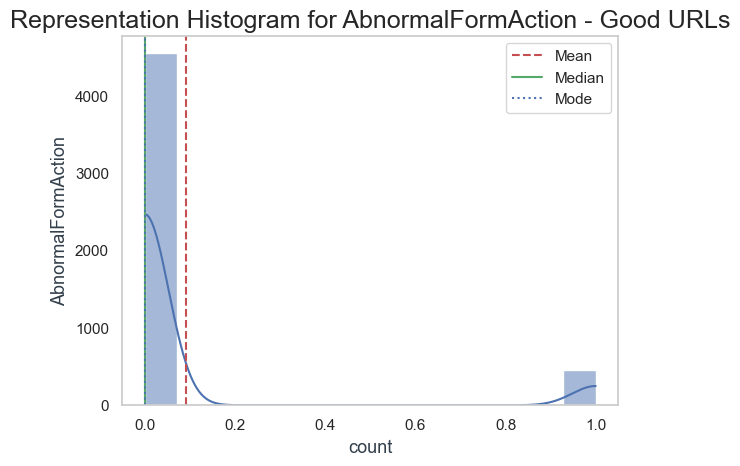

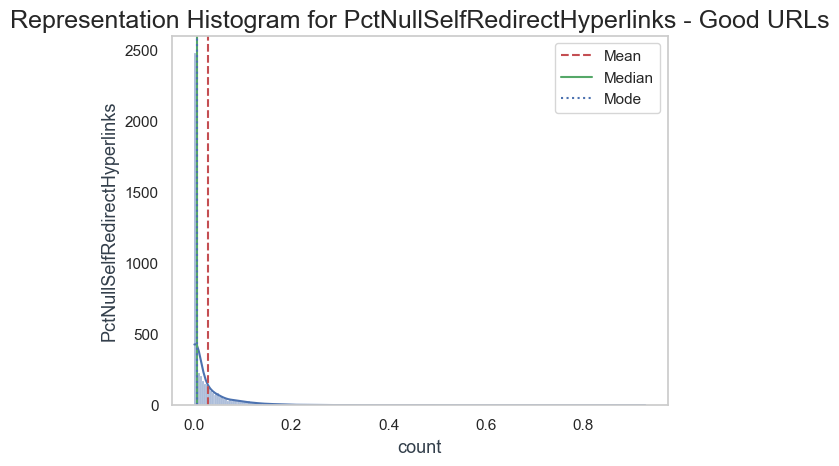

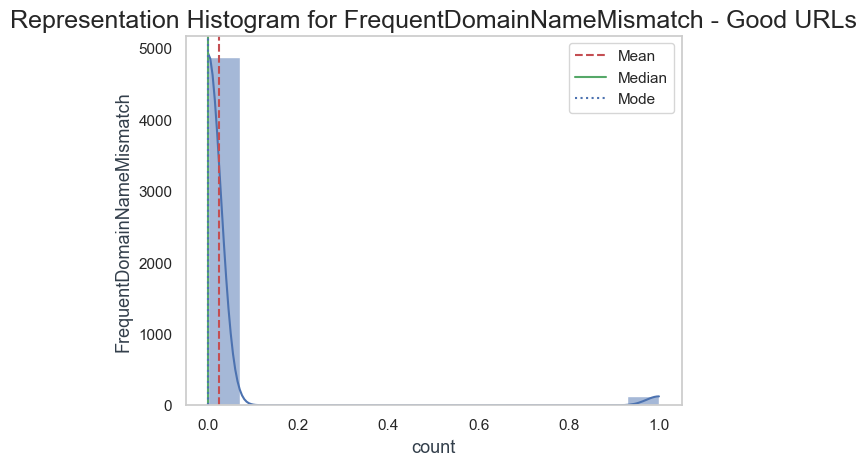

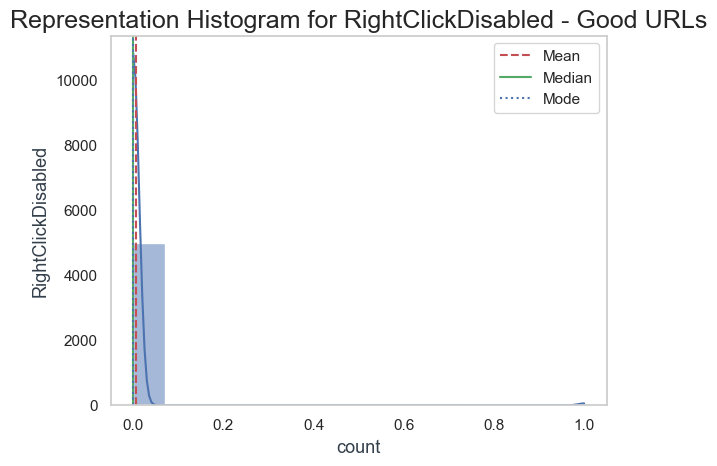

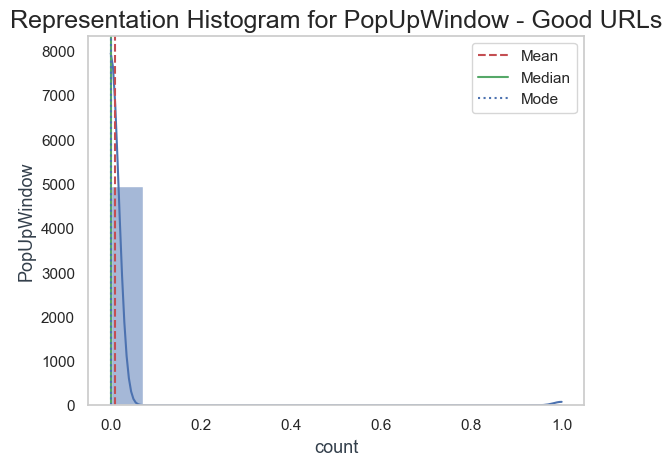

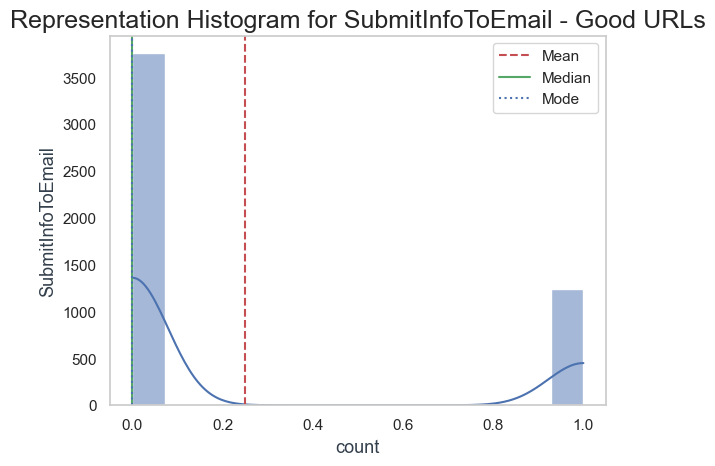

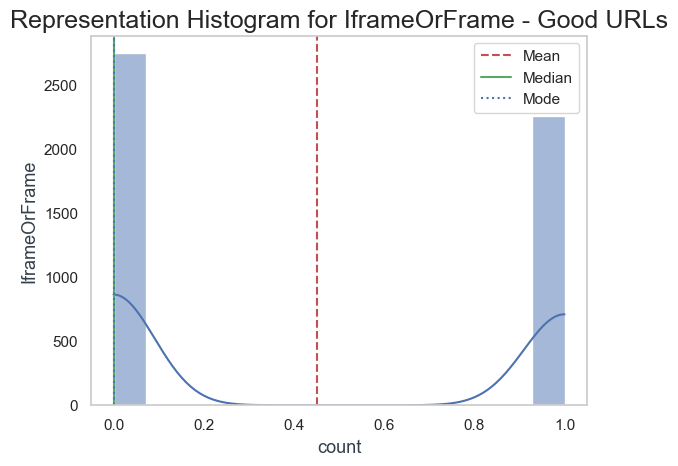

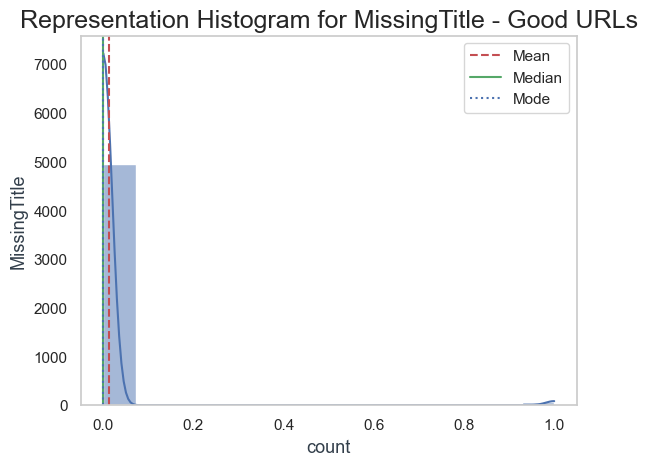

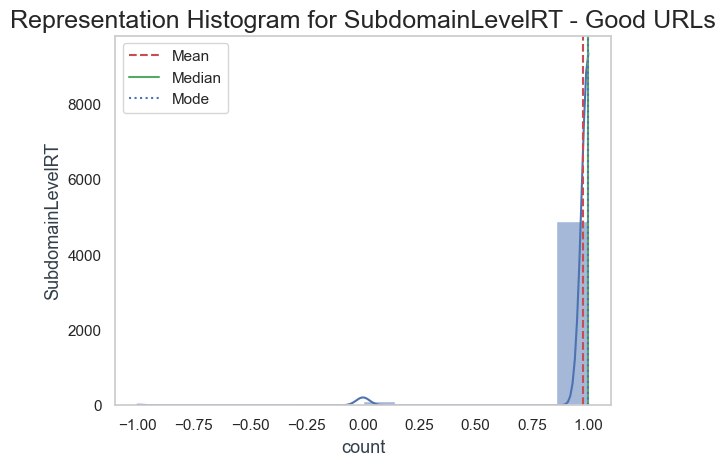

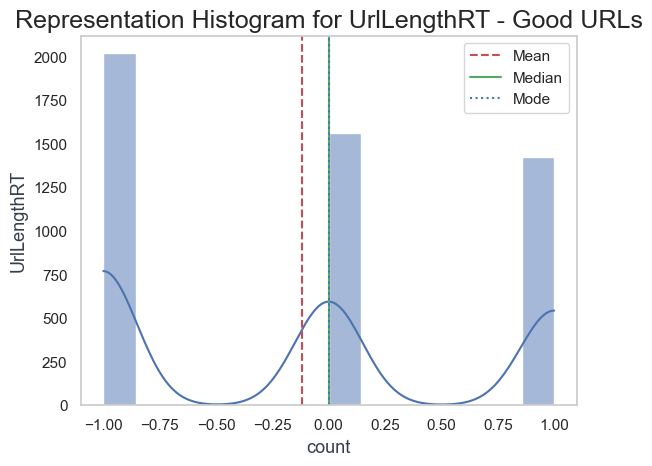

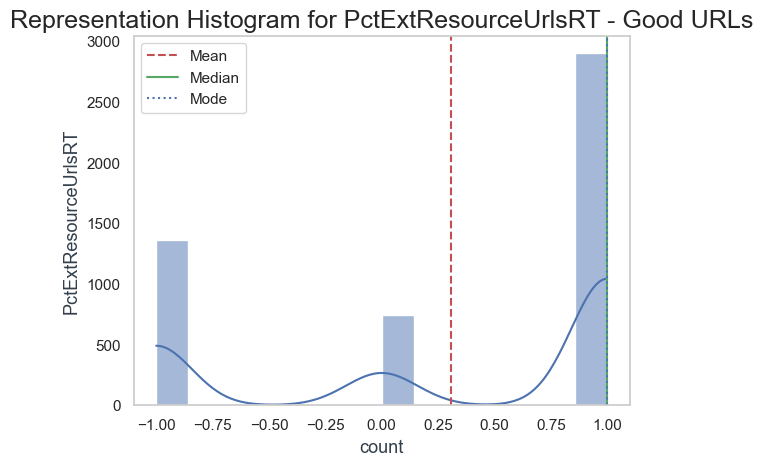

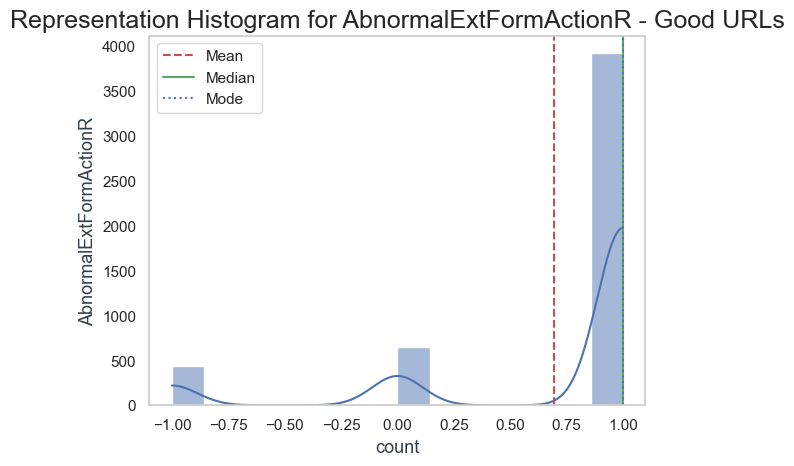

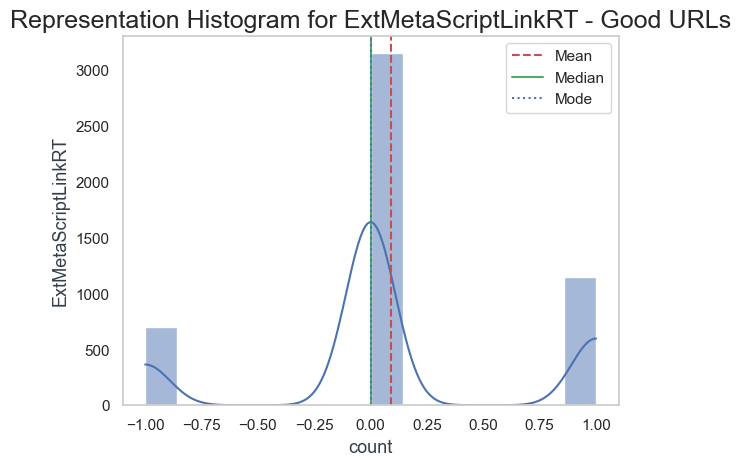

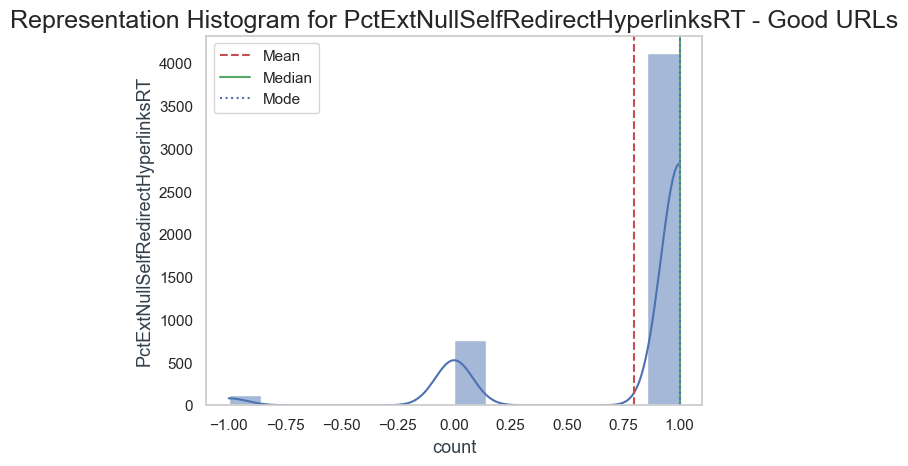

In [15]:
for feature in features:
    get_histplot_central_tendency(data_filtered[data_filtered["CLASS_LABEL"] == 0], feature, "Good URLs")

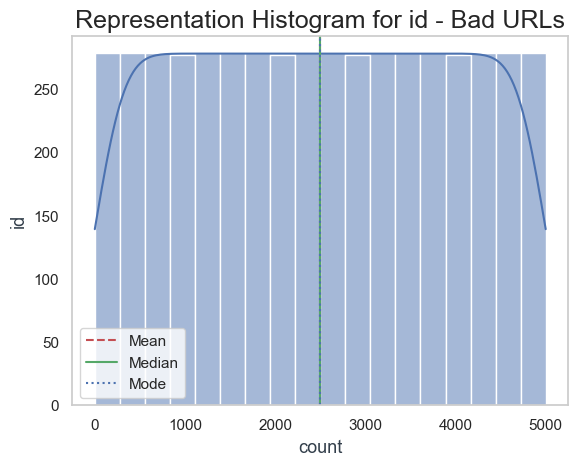

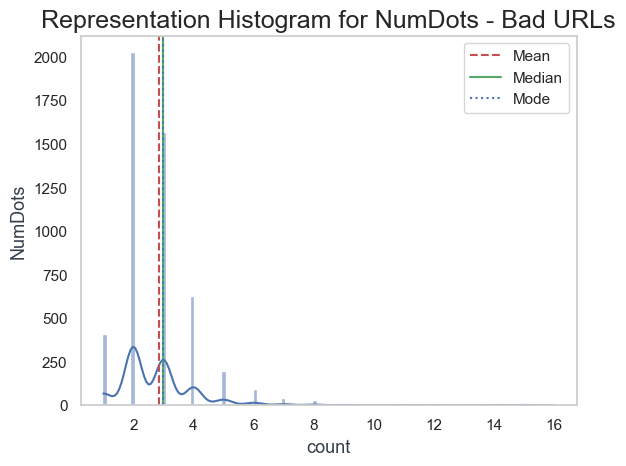

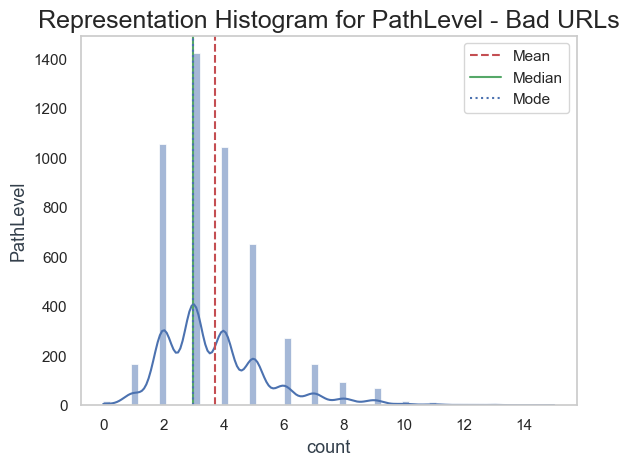

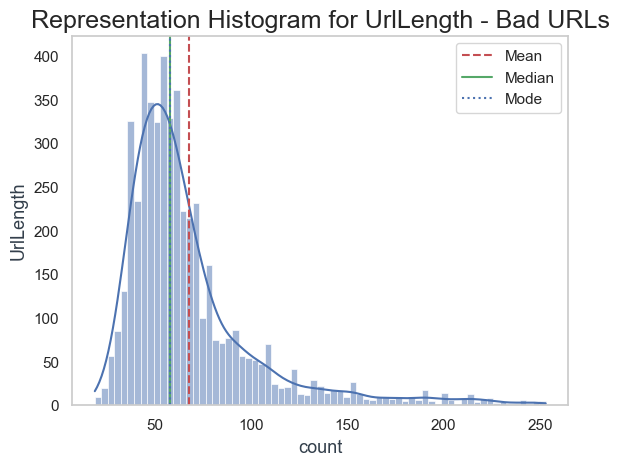

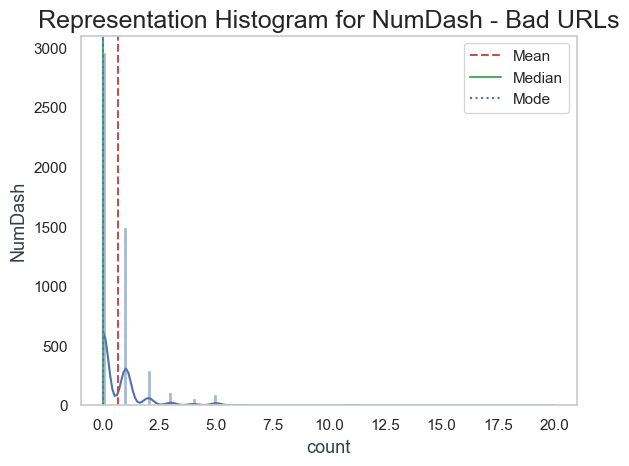

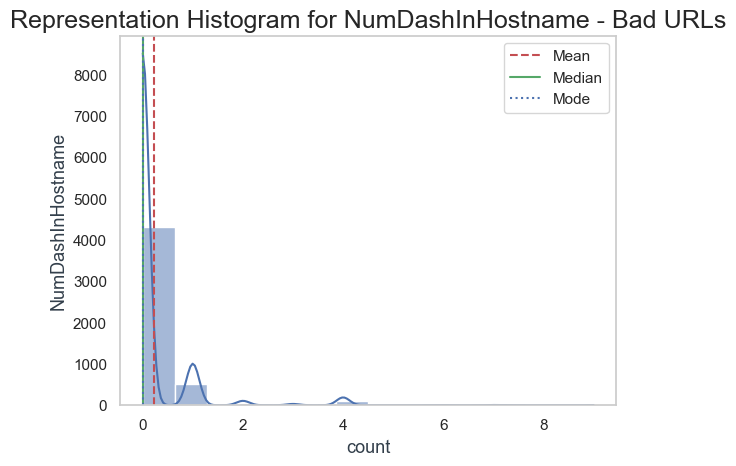

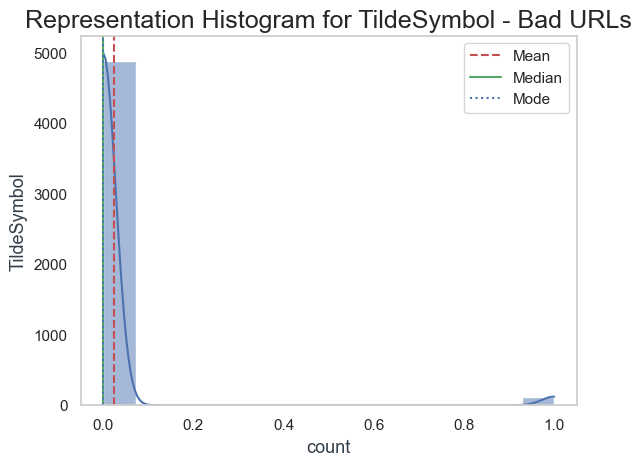

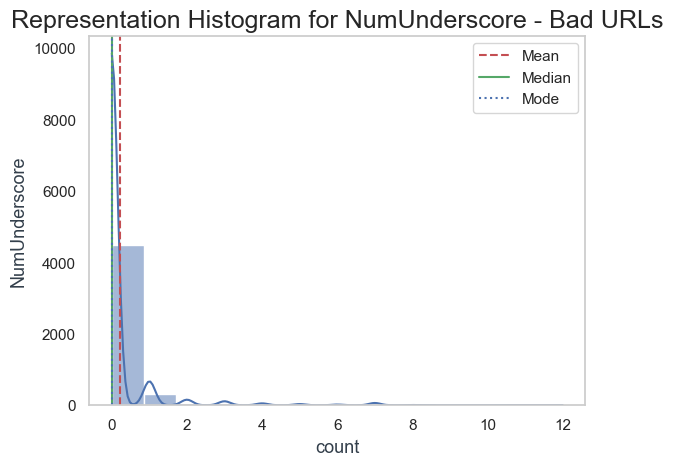

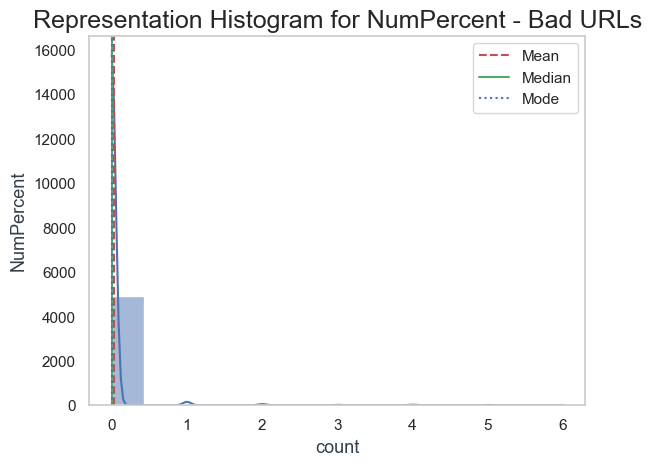

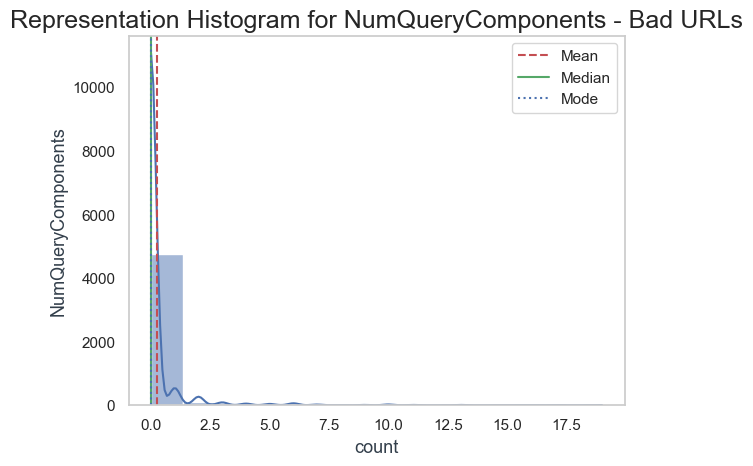

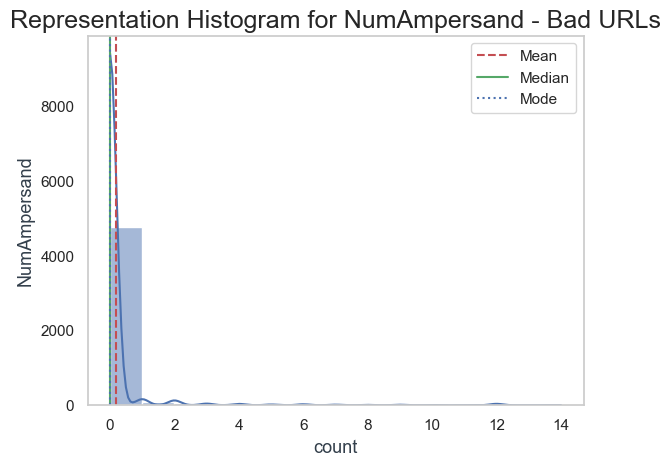

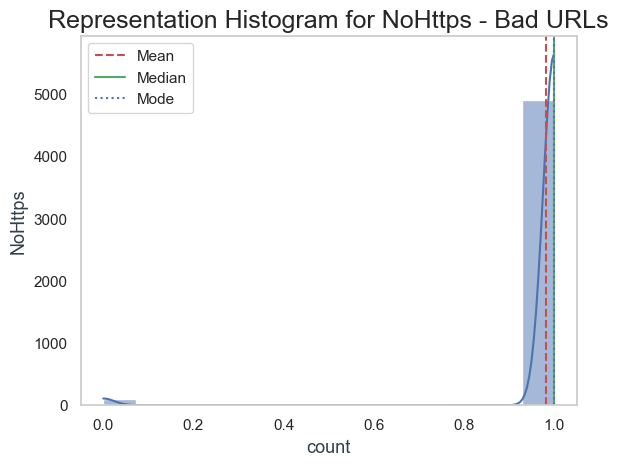

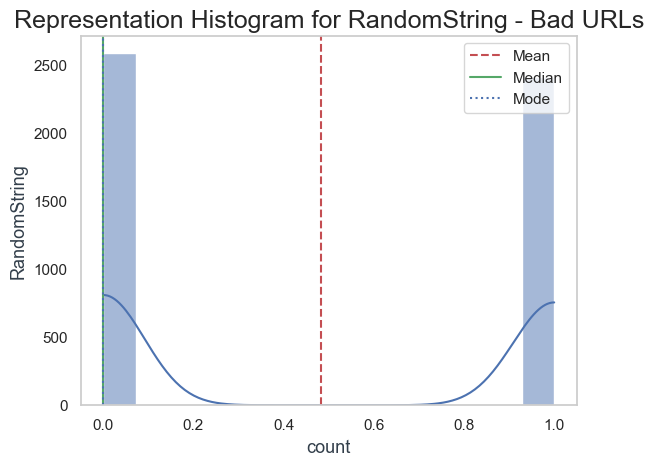

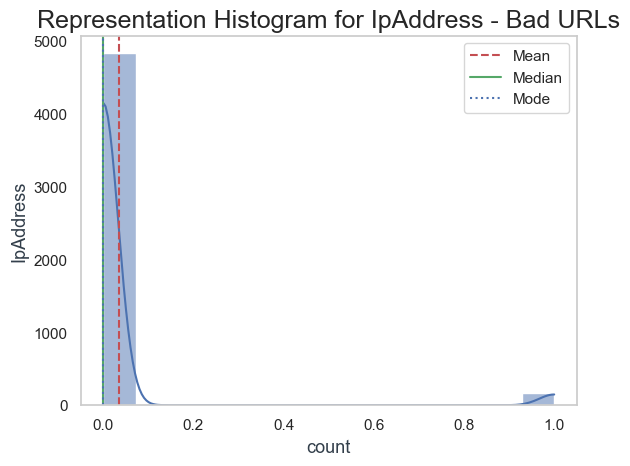

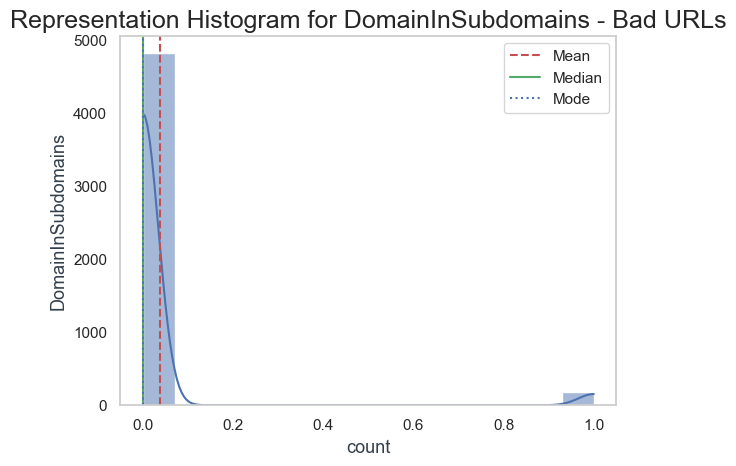

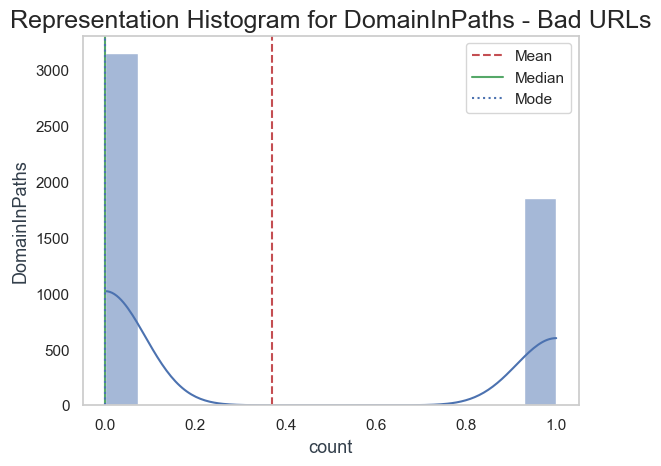

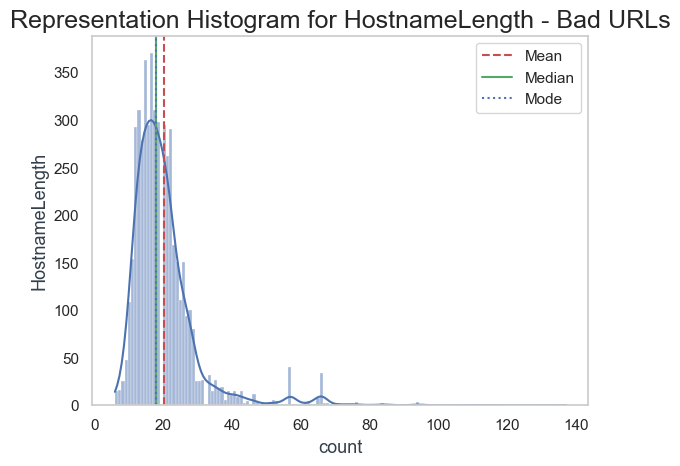

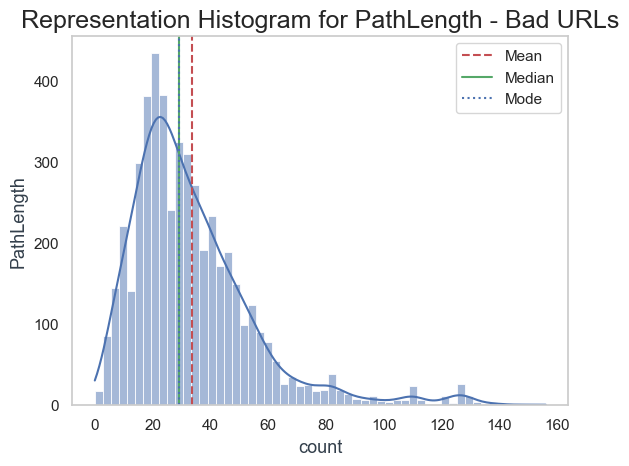

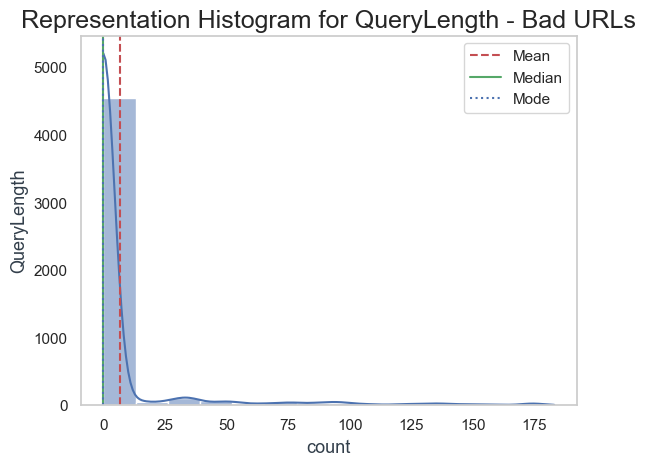

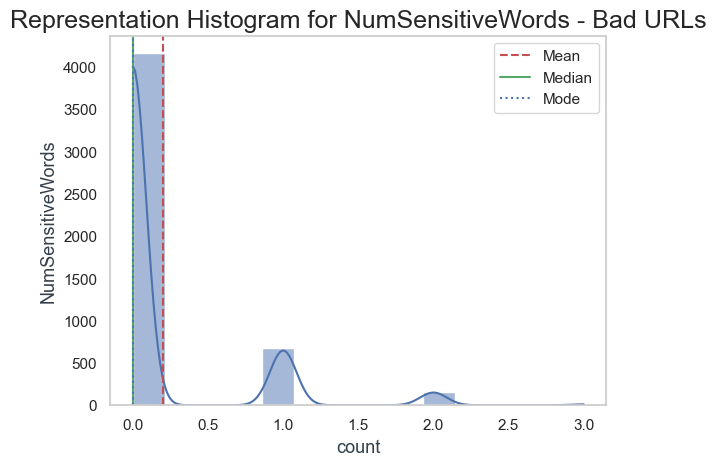

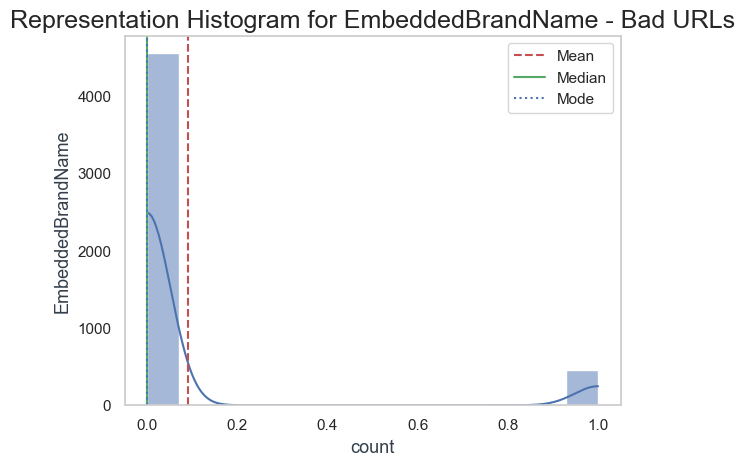

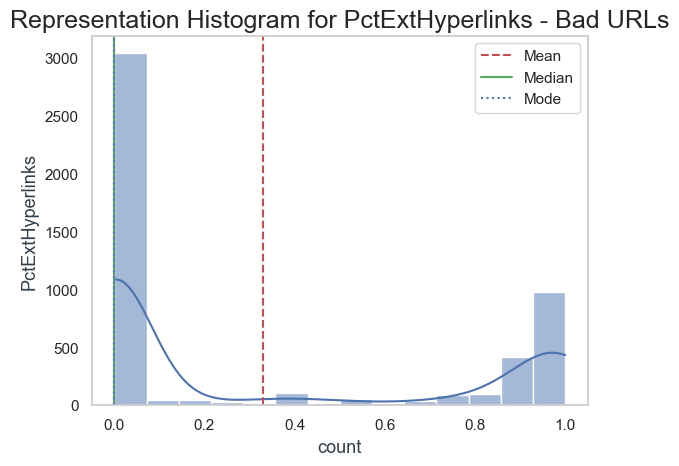

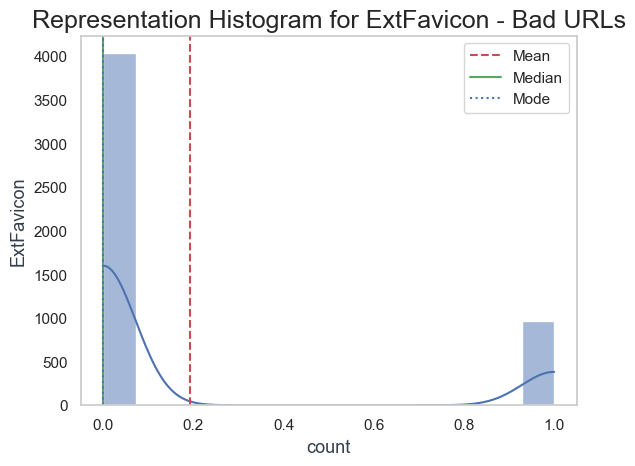

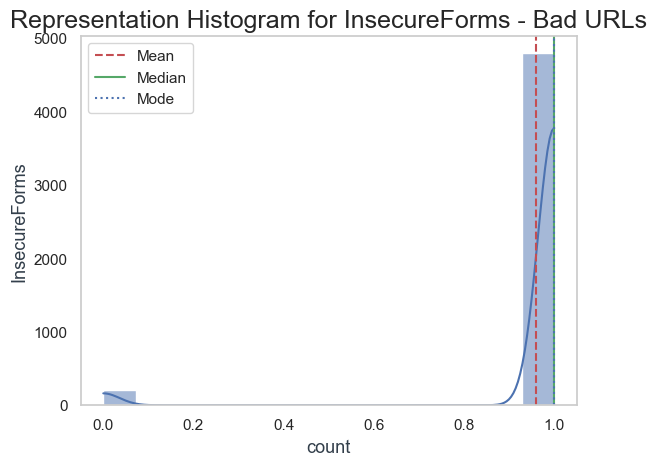

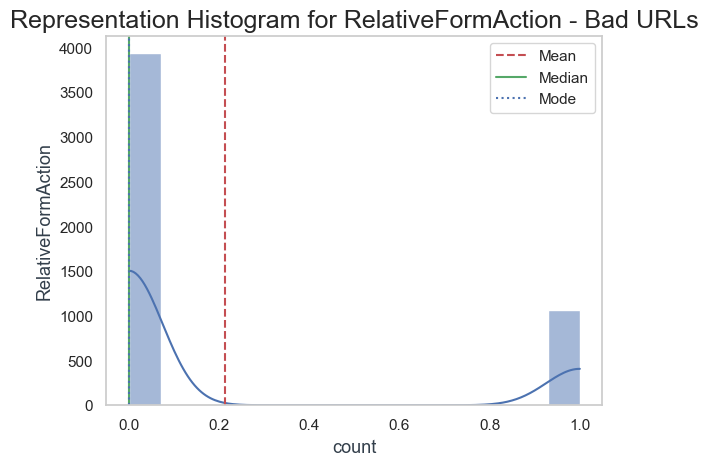

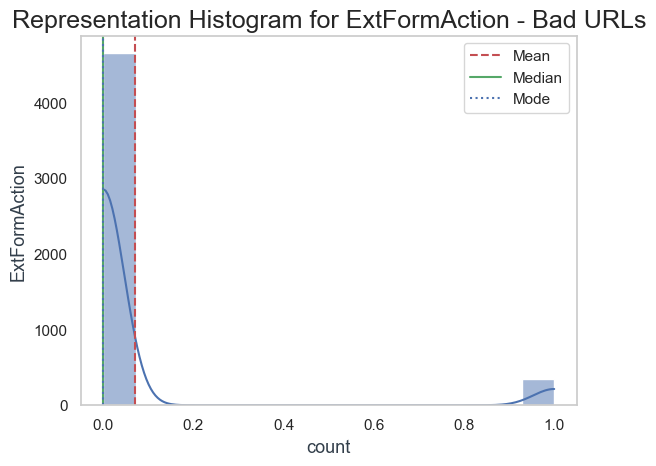

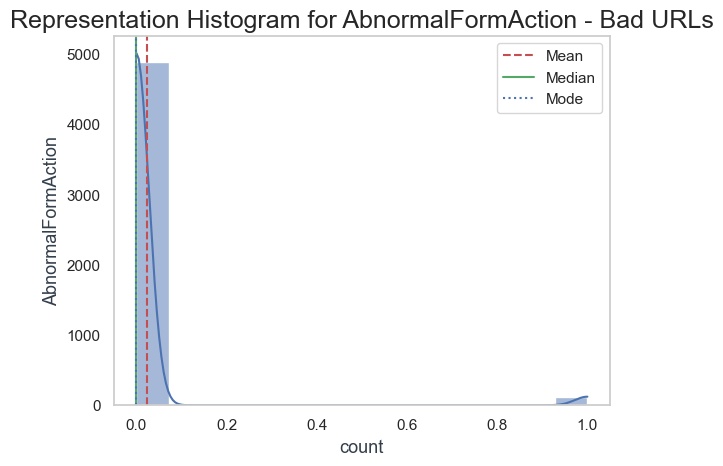

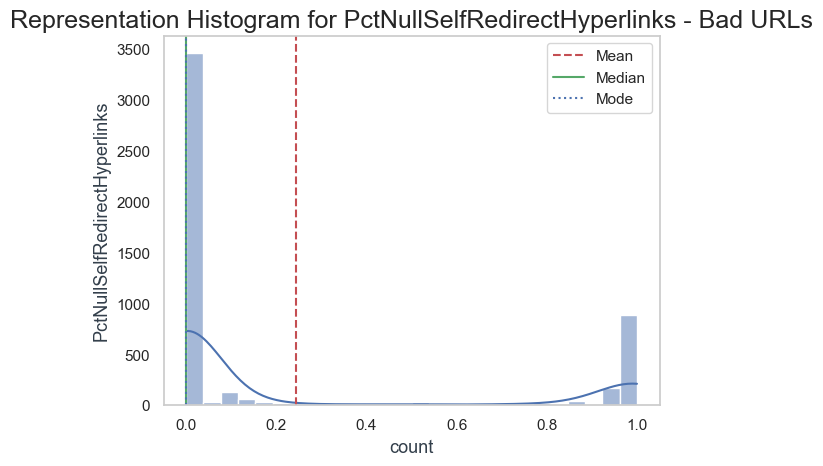

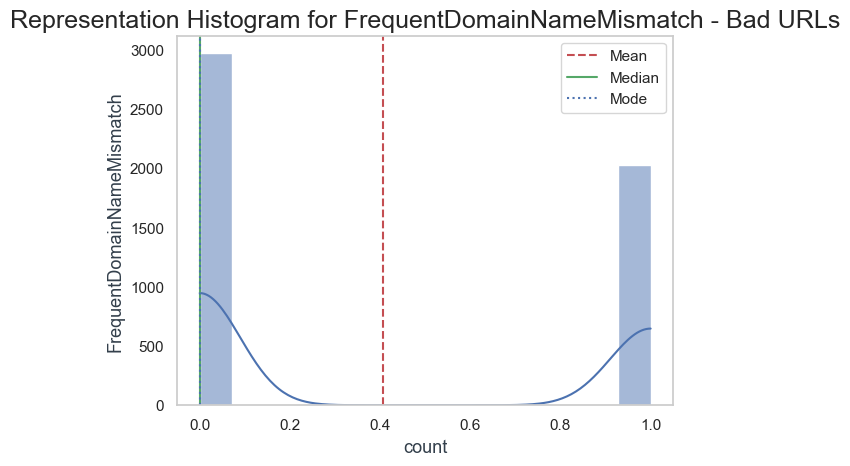

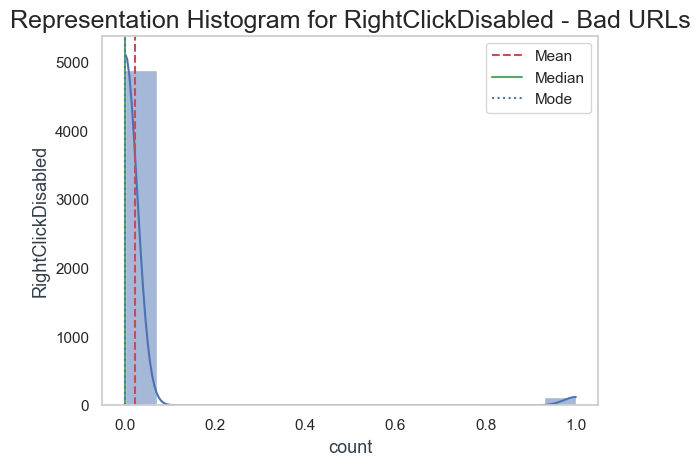

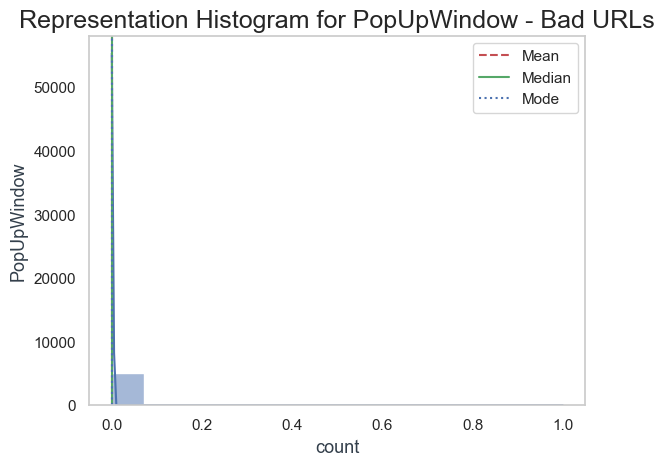

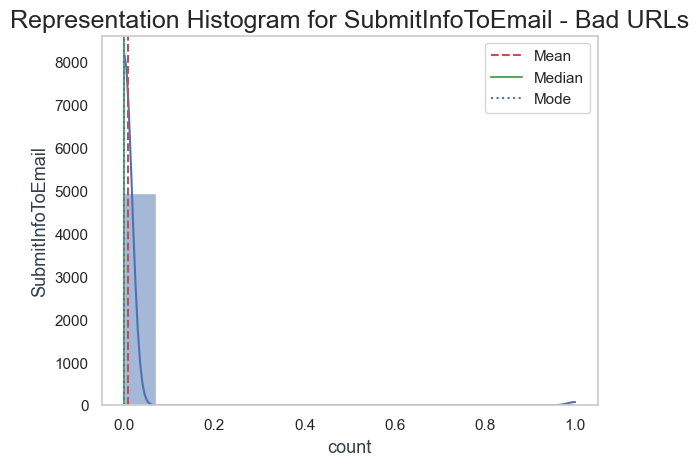

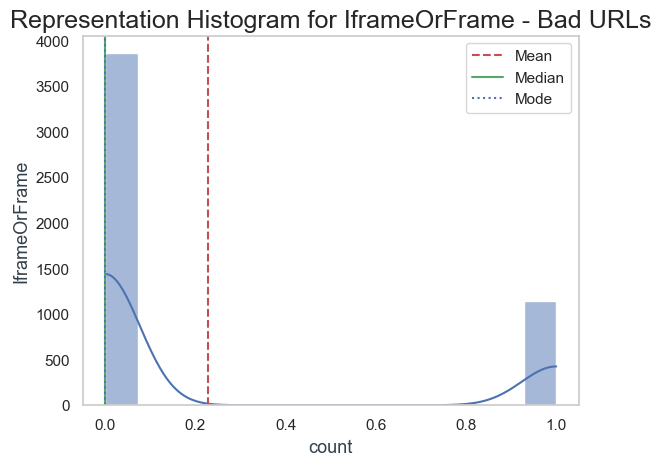

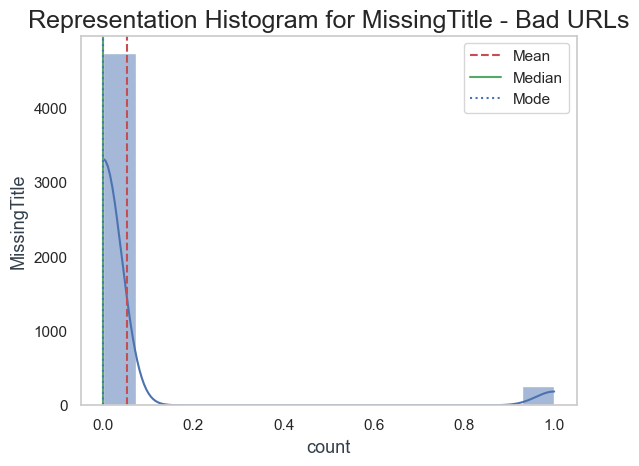

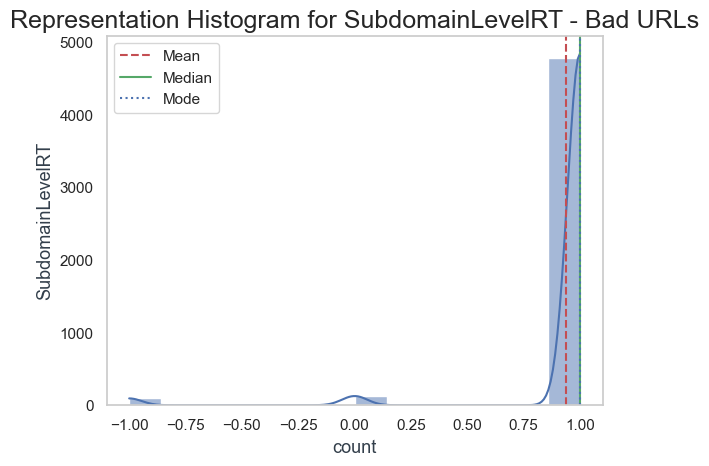

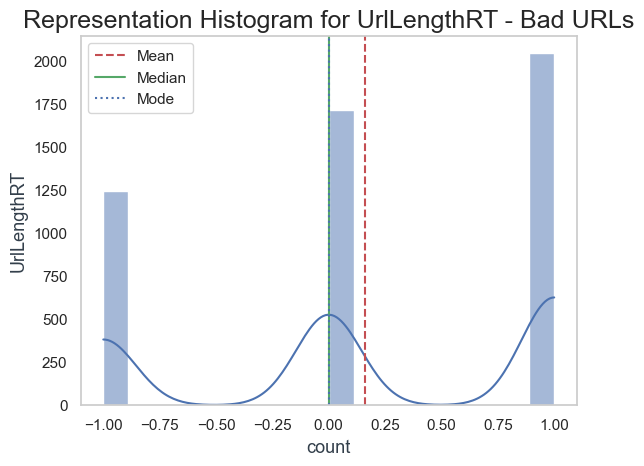

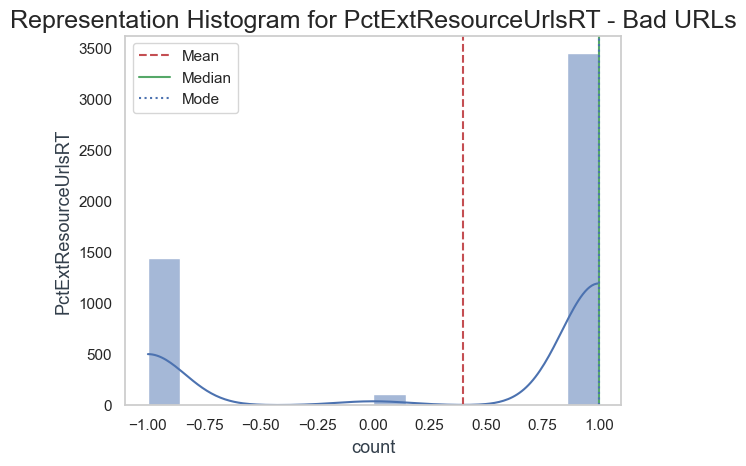

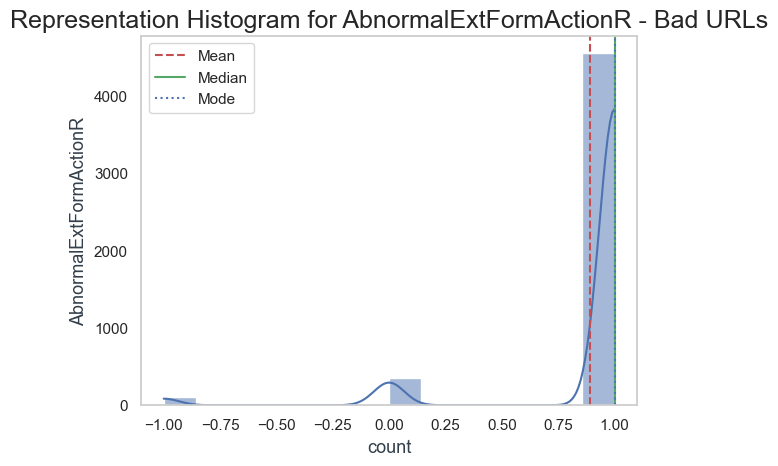

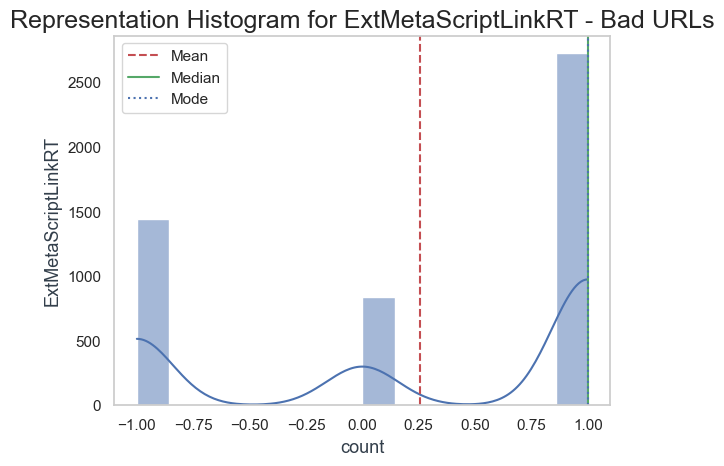

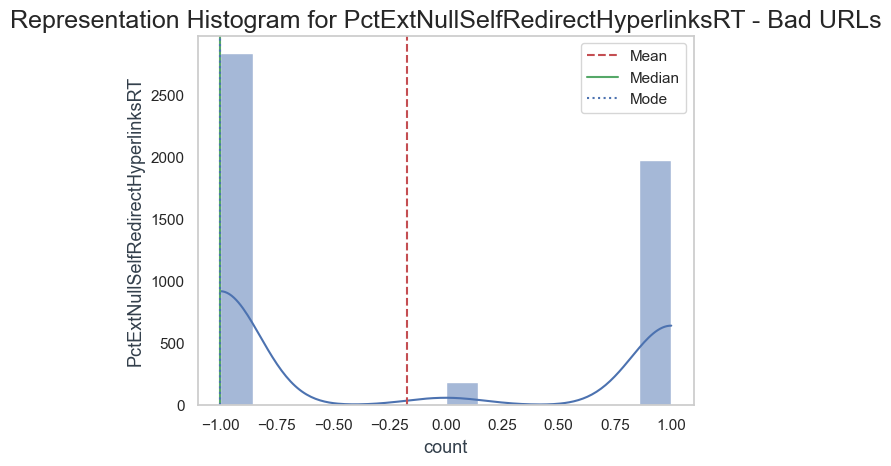

In [16]:
for feature in features:
    get_histplot_central_tendency(data_filtered[data_filtered["CLASS_LABEL"] == 1], feature, "Bad URLs")

## Creating Model

#### We will divide the data into train and test datasets before training our models. We'll train several models and select the one with the highest validation accuracy. This problem is classified as "Binary classification," and some of the models we'll train are as follows:
* LogisticRegression
* Decision Tree
* Random Forest

In [17]:
#Independent Variables
x = data_filtered.drop(["id", "CLASS_LABEL"],axis=1)

#Dependent Variable
y = data_filtered["CLASS_LABEL"]

In [18]:
# printing x
x.head()

NumDots  PathLevel  UrlLength  NumDash  NumDashInHostname  TildeSymbol  \
0        3          5         72        0                  0            0   
1        3          3        144        0                  0            0   
2        3          2         58        0                  0            0   
3        3          6         79        1                  0            0   
4        3          4         46        0                  0            0   

   NumUnderscore  NumPercent  NumQueryComponents  NumAmpersand  ...  \
0              0           0                   0             0  ...   
1              2           0                   2             1  ...   
2              0           0                   0             0  ...   
3              0           0                   0             0  ...   
4              0           0                   0             0  ...   

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0            0                  0              0             0   
1            0                  0              0             0   
2            0                  0              0             0   
3            0                  1              0             0   
4            0                  0              1             0   

   SubdomainLevelRT  UrlLengthRT  PctExtResourceUrlsRT  \
0                 1            0                     1   
1                 1           -1                     1   
2                 1            0                    -1   
3                 1           -1                     1   
4                 1            1                    -1   

   AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
0                       1                   -1   
1                       1                    1   
2                       1                   -1   
3                       1                    1   
4                       0                   -1   

   PctExtNullSelfRedirectHyperlinksRT  
0                                   1  
1                                   1  
2                                   0  
3                                  -1  
4                                  -1  

[5 rows x 39 columns]

In [19]:
ss = StandardScaler()
X_scaled = ss.fit_transform(x)

### Spliting the data

In [20]:
# We divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

#### 1] LogisticRegression

* To estimate the likelihood of a categorical dependent variable, a machine learning method known as logistic regression is applied. In logistic regression, the dependent variable is a binary variable with data coded as 0 (yes, success, etc.) or 1 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [21]:
# create logreg object
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred_test = logreg.predict(X_test)

In [23]:
pred_train = logreg.predict(X_train)

In [24]:
pickle.dump(logreg, open("logreg.pkl", "wb"))

In [25]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(logreg.score(X_test,y_test),2)

Training Accuracy : 0.9434666666666667
Testing Accuracy : 0.9424

 Logistic Regression CLASSIFICATION REPORT

Accuracy: 0.9424
              precision    recall  f1-score   support

  legitimate       0.95      0.94      0.94      1228
   malicious       0.94      0.95      0.94      1272

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500


 Logistic Regression CONFUSION MATRIX


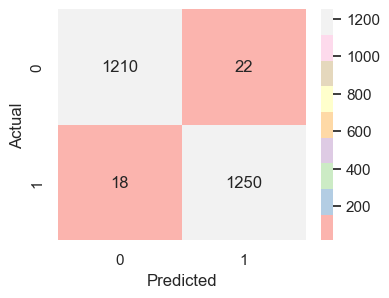

In [57]:
# Show Training and Testing Performance
print('Training Accuracy :', logreg.score(X_train, y_train))
print('Testing Accuracy :', logreg.score(X_test, y_test))

# Make predictions and print success rate
print('\n Logistic Regression CLASSIFICATION REPORT\n')
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=["legitimate","malicious"]))

# Complexity Matrix and Classification Report
print('\n Logistic Regression CONFUSION MATRIX')
cm = confusion_matrix(pred_test, y_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Pastel1", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 * Logistic Regression is giving 94% accuracy, Now we will store scores in dict to see which model perform best



#### 2] Decision Tree

* A decision tree is a flowchart-like structure where each leaf node represents a class label (decision made after computing all attributes) and each internal node represents a "test" on an attribute (such as whether a coin flips heads or tails).

In [27]:
# Creating a Decision Tree model
dect_model = DecisionTreeClassifier()
dect_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [28]:
pred_test = dect_model.predict(X_test)

In [29]:
pred_train = dect_model.predict(X_train)

In [30]:
pickle.dump(dect_model, open("dect_model.pkl", "wb"))

In [31]:
Scores_ml['Decision Tree'] = np.round(dect_model.score(X_test,y_test),2)

Training Accuracy : 1.0
Testing Accuracy : 0.9644

 Decision Tree CLASSIFICATION REPORT

Accuracy: 0.9644


              precision    recall  f1-score   support

  legitimate       0.97      0.96      0.96      1228
   malicious       0.96      0.97      0.97      1272

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500




 Decision Tree CONFUSION MATRIX


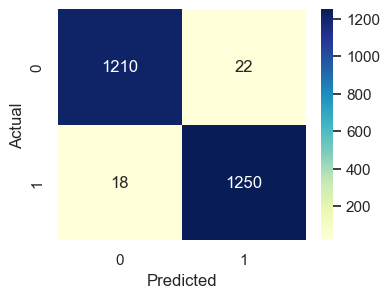

In [58]:
 #Show Training and Testing Performance
print('Training Accuracy :', dect_model.score(X_train, y_train))
print('Testing Accuracy :', dect_model.score(X_test, y_test))

# Make predictions and print success rate
print('\n Decision Tree CLASSIFICATION REPORT\n')
y_pred = dect_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred,target_names=["legitimate","malicious"]))

print('\n')
# Complexity Matrix and Classification Report
print('\n Decision Tree CONFUSION MATRIX')
con_mat = confusion_matrix(pred_test, y_test)
plt.figure(figsize=(4,3))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3] Random Forest

* Random forests, also known as random choice forests, are an ensemble learning approach for classification, regression, and other problems that works by building a large number of decision trees during training. For classification problems, the random forest output is the class chosen by the majority of trees.

In [33]:
# Creating a Random Forest model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
pred_test = RF_model.predict(X_test)

In [35]:
pred_train = RF_model.predict(X_train)

In [36]:
pickle.dump(RF_model, open("RF_model.pkl", "wb"))

In [37]:
Scores_ml['Random Forest'] = np.round(RF_model.score(X_test,y_test),2)

Training Accuracy : 1.0
Testing Accuracy : 0.984

 Random Forest CLASSIFICATION REPORT

Accuracy: 0.984


              precision    recall  f1-score   support

  legitimate       0.98      0.99      0.98      1228
   malicious       0.99      0.98      0.98      1272

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500




 Random Forest CONFUSION MATRIX


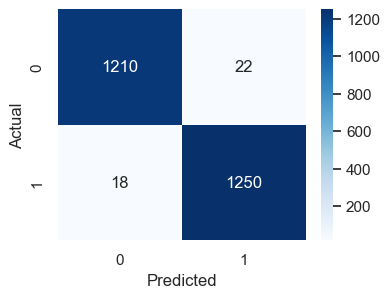

In [59]:
# Show Training and Testing Performance
print('Training Accuracy :', RF_model.score(X_train, y_train))
print('Testing Accuracy :', RF_model.score(X_test, y_test))

# Make predictions and print success rate
print('\n Random Forest CLASSIFICATION REPORT\n')
y_pred = RF_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred, target_names=["legitimate","malicious"]))

print('\n')
# Complexity Matrix and Classification Report
print('\n Random Forest CONFUSION MATRIX')
con_mat = confusion_matrix(pred_test, y_test)
plt.figure(figsize=(4,3))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/Users/oudoum/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Accuracy'>

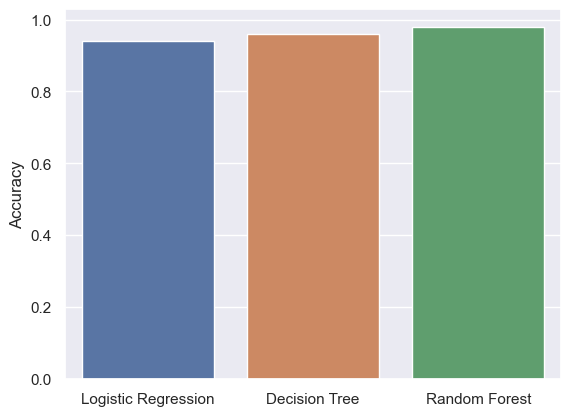

In [39]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So,  Random Forest is the best fit model, with 98.2%**

# Model Evaluation

## cross-validation Evaluation

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, x, y, cv=5)

# Print out the mean cross-validation score
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")


Mean CV accuracy: 0.97


## ROC curves Evaluation

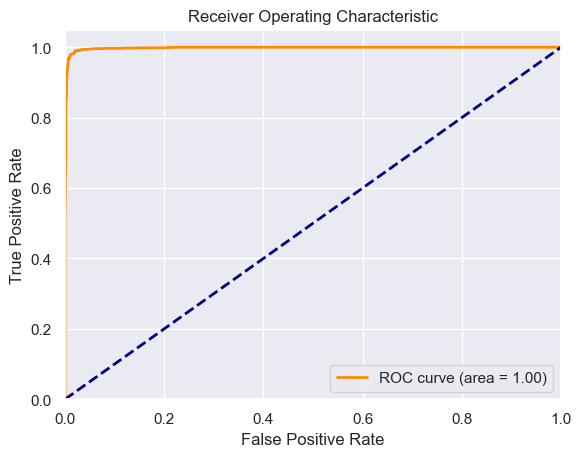

Accuracy: 0.98


In [41]:

from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# For Testing 

In [42]:
phish_model_ls = pickle.load(open('RF_model.pkl', 'rb'))

In [43]:
input_data=(1, 89, 66, 23, 94, 28.1, 0.167, 21,4,7,32,8,2,0,43,21,34,5,12,5,23,24,36,6,78,4,1,2,4,56,7,7,7,4,24,56,21,1,2)

input_data_as_numpy_array = np.asarray(input_data)
   
# reshape the array as we are predicting for one instance\n",
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predict = phish_model_ls.predict(input_data_reshaped)
print(predict)
if (predict[0] == 0):
    print('non phishing')
else:
    print(' phishing detected')
    

[0]
non phishing


## The objective of this notebook have been achieved 